In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 1.97 ms (started: 2021-12-06 01:37:21 +00:00)


# Scikit multi-flow preparation


In [ ]:
pip install -U scikit-multiflow

time: 3.24 s (started: 2021-12-06 01:37:23 +00:00)


# Offline packages and timer

In [ ]:
!pip install pycaret
# %matplotlib notebook
!pip install umap-learn
!pip install shap
#installing auto timer 
!pip install ipython-autotime

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 13.9 s (started: 2021-12-06 01:37:26 +00:00)


#Importing Libraries

In [ ]:
pip install --upgrade numpy

     |████████████████████████████████| 15.7 MB 4.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
pycaret 2.3.5 requires numpy==1.19.5, but you have numpy 1.21.4 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


time: 8.38 s (started: 2021-12-06 01:33:18 +00:00)


In [ ]:
import pandas as pd
import numpy as np
# preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn import preprocessing
# online classifiers
from skmultiflow.meta import OzaBaggingClassifier
from skmultiflow.lazy import KNNClassifier
from skmultiflow.neural_networks import PerceptronMask
from skmultiflow.trees import HoeffdingTreeClassifier
# offline classifiers
from sklearn.neighbors import KNeighborsClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier
# Data stream
from skmultiflow.data import DataStream
# metrics
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, cohen_kappa_score, accuracy_score
# time
import time
import queue
# counter
from collections import Counter
# deepcopy
from copy import deepcopy
# pycaret
from pycaret.classification import *
# shuffle
from sklearn.utils import shuffle
# umap
#import umap.umap_ as umap

time: 10.1 ms (started: 2021-12-06 01:37:41 +00:00)


# Importing Datasets
Split testing and training set

In [ ]:
df_train_ = pd.read_csv('/content/drive/MyDrive/uOttawa/thirdSemester/Cybersecurity/Project/FinalProject/KDDTrain+.txt', header=None)
df_test_ = pd.read_csv('/content/drive/MyDrive/uOttawa/thirdSemester/Cybersecurity/Project/FinalProject/KDDTest+.txt', header=None)

time: 501 ms (started: 2021-12-06 01:38:54 +00:00)


In [ ]:
df_train_.shape, df_test_.shape

((125973, 43), (22544, 43))

time: 3.81 ms (started: 2021-12-06 01:38:55 +00:00)


In [ ]:
df = pd.concat([df_train_, df_test_], axis = 0)

time: 52.4 ms (started: 2021-12-06 01:38:57 +00:00)


In [ ]:
df = shuffle(df)

time: 105 ms (started: 2021-12-06 01:38:57 +00:00)


In [ ]:
df.reset_index(inplace=True, drop=True)

time: 1.32 ms (started: 2021-12-06 01:38:57 +00:00)


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0,udp,private,SF,49,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,254,1.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,snmpguess,15
1,12114,udp,other,SF,146,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,3,0.01,0.60,0.95,0.00,0.00,0.00,0.00,0.00,normal,21
2,0,tcp,http,SF,288,1769,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,34,34,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,normal,21
3,0,udp,private,SF,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,21,0.0,0.0,0.0,0.0,0.44,0.08,0.00,255,87,0.34,0.06,1.00,0.00,0.00,0.00,0.00,0.00,satan,19
4,0,tcp,http,SF,281,751,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,11,0.0,0.0,0.0,0.0,1.00,0.00,0.27,31,255,1.00,0.00,0.03,0.03,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,daytime,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,287,5,1.0,1.0,0.0,0.0,0.02,0.06,0.00,255,13,0.05,0.08,0.00,0.00,1.00,1.00,0.00,0.00,neptune,18
148513,0,tcp,ftp_data,SF,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,25,95,0.72,0.08,0.72,0.02,0.00,0.00,0.00,0.00,normal,20
148514,0,tcp,http,SF,197,2909,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,19,0.0,0.0,0.0,0.0,1.00,0.00,0.16,229,255,1.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,normal,21
148515,0,tcp,http,SF,339,2119,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,11,0.0,0.0,0.0,0.0,1.00,0.00,0.00,47,255,1.00,0.00,0.02,0.04,0.00,0.00,0.00,0.00,normal,21


time: 55.4 ms (started: 2021-12-06 01:38:58 +00:00)


In [ ]:
cols=["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "Class"]

time: 4.05 ms (started: 2021-12-06 01:38:58 +00:00)


In [ ]:
df.drop(columns=[42], inplace=True)

time: 21.8 ms (started: 2021-12-06 01:38:59 +00:00)


In [ ]:
df.columns = cols

time: 1.58 ms (started: 2021-12-06 01:38:59 +00:00)


In [ ]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,udp,private,SF,49,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,254,1.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,snmpguess
1,12114,udp,other,SF,146,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,3,0.01,0.60,0.95,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,http,SF,288,1769,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,34,34,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,normal
3,0,udp,private,SF,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,21,0.0,0.0,0.0,0.0,0.44,0.08,0.00,255,87,0.34,0.06,1.00,0.00,0.00,0.00,0.00,0.00,satan
4,0,tcp,http,SF,281,751,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,11,0.0,0.0,0.0,0.0,1.00,0.00,0.27,31,255,1.00,0.00,0.03,0.03,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,daytime,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,287,5,1.0,1.0,0.0,0.0,0.02,0.06,0.00,255,13,0.05,0.08,0.00,0.00,1.00,1.00,0.00,0.00,neptune
148513,0,tcp,ftp_data,SF,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,25,95,0.72,0.08,0.72,0.02,0.00,0.00,0.00,0.00,normal
148514,0,tcp,http,SF,197,2909,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,19,0.0,0.0,0.0,0.0,1.00,0.00,0.16,229,255,1.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,normal
148515,0,tcp,http,SF,339,2119,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,11,0.0,0.0,0.0,0.0,1.00,0.00,0.00,47,255,1.00,0.00,0.02,0.04,0.00,0.00,0.00,0.00,normal


time: 44.1 ms (started: 2021-12-06 01:39:00 +00:00)


# Pre-processing

## Any Nan values? 

Ans: No

In [ ]:
df.isnull().values.any()

False

time: 38.6 ms (started: 2021-12-06 01:39:03 +00:00)


## Any inf values?

Ans: no

Since np.isinf function only works on float data type, I will temporarily keep the float data and remove the rest.

In [ ]:
df_float_train = df.select_dtypes(include=[np.float])

time: 8.67 ms (started: 2021-12-06 01:39:04 +00:00)


Find the indices of float data which contain inf value

In [ ]:
inf_indices_train = df_float_train.index[np.isinf(df_float_train).any(1)]

time: 8.07 ms (started: 2021-12-06 01:39:07 +00:00)


In [ ]:
inf_indices_train

Int64Index([], dtype='int64')

time: 2.6 ms (started: 2021-12-06 01:39:07 +00:00)


# label encoder

In [ ]:
le = preprocessing.LabelEncoder()

time: 1.06 ms (started: 2021-12-06 01:39:08 +00:00)


In [ ]:
df[["protocol_type", "service", "flag"]] = df[["protocol_type", "service", "flag"]].apply(le.fit_transform)

time: 119 ms (started: 2021-12-06 01:39:09 +00:00)


In [ ]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,2,49,9,49,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,254,1.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,snmpguess
1,12114,2,44,9,146,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,3,0.01,0.60,0.95,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,24,9,288,1769,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,34,34,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,normal
3,0,2,49,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,21,0.0,0.0,0.0,0.0,0.44,0.08,0.00,255,87,0.34,0.06,1.00,0.00,0.00,0.00,0.00,0.00,satan
4,0,1,24,9,281,751,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,11,0.0,0.0,0.0,0.0,1.00,0.00,0.27,31,255,1.00,0.00,0.03,0.03,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,1,9,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,287,5,1.0,1.0,0.0,0.0,0.02,0.06,0.00,255,13,0.05,0.08,0.00,0.00,1.00,1.00,0.00,0.00,neptune
148513,0,1,20,9,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,25,95,0.72,0.08,0.72,0.02,0.00,0.00,0.00,0.00,normal
148514,0,1,24,9,197,2909,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,19,0.0,0.0,0.0,0.0,1.00,0.00,0.16,229,255,1.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,normal
148515,0,1,24,9,339,2119,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,11,0.0,0.0,0.0,0.0,1.00,0.00,0.00,47,255,1.00,0.00,0.02,0.04,0.00,0.00,0.00,0.00,normal


time: 52.7 ms (started: 2021-12-06 01:39:09 +00:00)


# Labels

In [ ]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(df.Class.map(lambda x:1 if x=='normal' else 0))

time: 59.2 ms (started: 2021-12-06 01:39:10 +00:00)


In [ ]:
y = bin_label

time: 1.07 ms (started: 2021-12-06 01:39:10 +00:00)


In [ ]:
y = pd.DataFrame(y)

time: 1.18 ms (started: 2021-12-06 01:39:10 +00:00)


In [ ]:
y

,Class
0,0
1,1
2,1
3,0
4,1
...,...
148512,0
148513,1
148514,1
148515,1


time: 11.2 ms (started: 2021-12-06 01:39:11 +00:00)


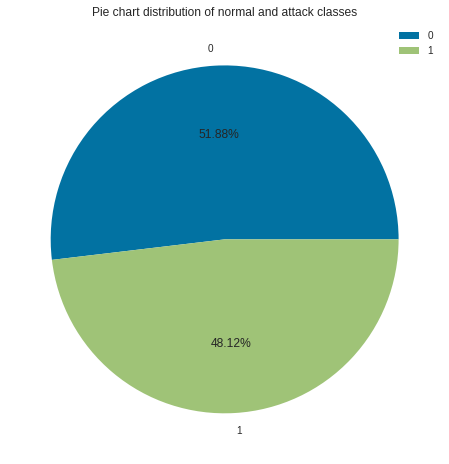

time: 116 ms (started: 2021-12-06 01:39:12 +00:00)


In [ ]:
# pie chart distribution of normal and attack labels 
plt.figure(figsize=(8,8)) 
plt.pie(y.Class.value_counts(),labels=y.Class.unique(),autopct='%0.2f%%') 
plt.title("Pie chart distribution of normal and attack classes") 
plt.legend() 
#plt.savefig('plots/Pie_chart_binary.png') 
plt.show()

# min max 

In [ ]:
min_max_scaler = MinMaxScaler()

time: 898 µs (started: 2021-12-06 01:39:13 +00:00)


In [ ]:
numeric = df.drop(columns = ["Class"]).select_dtypes(include='number')

time: 55.3 ms (started: 2021-12-06 01:39:14 +00:00)


In [ ]:
X = pd.DataFrame(min_max_scaler.fit_transform(numeric))

time: 91.2 ms (started: 2021-12-06 01:39:15 +00:00)


In [ ]:
normalized_cols=["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]

time: 3.04 ms (started: 2021-12-06 01:39:16 +00:00)


In [ ]:
X.columns = normalized_cols

time: 1.77 ms (started: 2021-12-06 01:39:16 +00:00)


In [ ]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000000,1.0,0.710145,0.9,3.550818e-08,3.740637e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005871,0.005871,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,0.996078,1.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00
1,0.209893,1.0,0.637681,0.9,1.057999e-07,8.015650e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,0.011765,0.01,0.60,0.95,0.00,0.00,0.00,0.00,0.00
2,0.000000,0.5,0.347826,0.9,2.087011e-07,1.350446e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066536,0.066536,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,1.000000,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02
3,0.000000,1.0,0.710145,0.9,7.246566e-10,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093933,0.041096,0.0,0.0,0.0,0.0,0.44,0.08,0.00,1.000000,0.341176,0.34,0.06,1.00,0.00,0.00,0.00,0.00,0.00
4,0.000000,0.5,0.347826,0.9,2.036285e-07,5.733098e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005871,0.021526,0.0,0.0,0.0,0.0,1.00,0.00,0.27,0.121569,1.000000,1.00,0.00,0.03,0.03,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0.000000,0.5,0.130435,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.561644,0.009785,1.0,1.0,0.0,0.0,0.02,0.06,0.00,1.000000,0.050980,0.05,0.08,0.00,0.00,1.00,1.00,0.00,0.00
148513,0.000000,0.5,0.289855,0.9,8.695880e-09,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.098039,0.372549,0.72,0.08,0.72,0.02,0.00,0.00,0.00,0.00
148514,0.000000,0.5,0.347826,0.9,1.427574e-07,2.220717e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.037182,0.0,0.0,0.0,0.0,1.00,0.00,0.16,0.898039,1.000000,1.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00
148515,0.000000,0.5,0.347826,0.9,2.456586e-07,1.617635e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021526,0.021526,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.184314,1.000000,1.00,0.00,0.02,0.04,0.00,0.00,0.00,0.00


time: 56.4 ms (started: 2021-12-06 01:39:17 +00:00)


# Umap

In [ ]:


import umap.umap_ as umap

Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/umap-0.1.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/umap/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/umap/__pycache__/layouts.rdist-30.py37m.1.nbc
    /usr/local/lib/python3.7/dist-packages/umap/__pycache__/layouts.rdist-30.py37m.nbi
    /usr/local/lib/python3.7/dist-packages/umap/aligned_umap.py
    /usr/local/lib/python3.7/dist-packages/umap/distances.py
    /usr/local/lib/python3.7/dist-packages/umap/layouts.py
    /usr/local/lib/python3.7/dist-packages/umap/parametric_umap.py
    /usr/local/lib/python3.7/dist-packages/umap/plot.py
    /usr/local/lib/python3.7/dist-packages/umap/sparse.py
    /usr/local/lib/python3.7/dist-packages/umap/spectral.py
    /usr/local/lib/python3.7/dist-packages/umap/umap_.py
    /usr/local/lib/python3.7/dist-packages/umap/utils.py
    /usr/local/lib/python3.7/dist-packages

FileNotFoundError: ignored

time: 21.9 s (started: 2021-12-06 01:24:48 +00:00)


In [ ]:
fit = umap.UMAP(n_components=38, n_neighbors=800)
u1 = fit.fit_transform(X)

AttributeError: ignored

time: 18.3 ms (started: 2021-12-06 01:24:09 +00:00)


In [ ]:
u1.shape

# split df into df_train and df_test 

In [ ]:
t_n = round(len(X) * 20/100)
t_n, len(X)-t_n

(29703, 118814)

time: 4.05 ms (started: 2021-12-06 01:39:21 +00:00)


In [ ]:
train = X.iloc[0:t_n, :]
y_train = y.iloc[0:t_n, :]

test = X.iloc[t_n:, :]
y_test = y.iloc[t_n:, :]

time: 2.85 ms (started: 2021-12-06 01:39:23 +00:00)


In [ ]:
test.reset_index(inplace=True, drop=True)

time: 1.42 ms (started: 2021-12-06 01:39:23 +00:00)


In [ ]:
train.shape, test.shape

((29703, 41), (118814, 41))

time: 3.7 ms (started: 2021-12-06 01:39:24 +00:00)


# Train and Test sets

In [ ]:
y_test

,Class
29703,0
29704,1
29705,0
29706,1
29707,0
...,...
148512,0
148513,1
148514,1
148515,1


time: 11.2 ms (started: 2021-12-06 01:40:14 +00:00)


In [ ]:
test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.5,0.507246,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.561644,0.019569,1.00,1.0,0.0,0.0,0.03,0.05,0.00,1.000000,0.039216,0.04,0.05,0.00,0.00,1.00,1.0,0.00,0.0
1,0.0,0.5,0.347826,0.9,2.536298e-07,1.089823e-05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015656,0.023483,0.00,0.0,0.0,0.0,1.00,0.00,0.17,0.203922,1.000000,1.00,0.00,0.02,0.03,0.00,0.0,0.00,0.0
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.191781,0.003914,0.98,1.0,0.0,0.0,0.02,0.07,0.00,1.000000,0.027451,0.03,0.06,0.00,0.00,1.00,1.0,0.00,0.0
3,0.0,0.5,0.289855,0.9,1.775409e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.00,0.0,0.0,0.0,1.00,0.00,0.00,0.345098,0.062745,0.14,0.06,0.14,0.12,0.00,0.0,0.03,0.0
4,0.0,0.5,0.086957,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714,0.039139,1.00,1.0,0.0,0.0,0.14,0.05,0.00,1.000000,0.070588,0.07,0.07,0.00,0.00,1.00,1.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118809,0.0,0.5,0.130435,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.561644,0.009785,1.00,1.0,0.0,0.0,0.02,0.06,0.00,1.000000,0.050980,0.05,0.08,0.00,0.00,1.00,1.0,0.00,0.0
118810,0.0,0.5,0.289855,0.9,8.695880e-09,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.00,0.0,0.0,0.0,1.00,0.00,0.00,0.098039,0.372549,0.72,0.08,0.72,0.02,0.00,0.0,0.00,0.0
118811,0.0,0.5,0.347826,0.9,1.427574e-07,2.220717e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.037182,0.00,0.0,0.0,0.0,1.00,0.00,0.16,0.898039,1.000000,1.00,0.00,0.00,0.02,0.00,0.0,0.00,0.0
118812,0.0,0.5,0.347826,0.9,2.456586e-07,1.617635e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021526,0.021526,0.00,0.0,0.0,0.0,1.00,0.00,0.00,0.184314,1.000000,1.00,0.00,0.02,0.04,0.00,0.0,0.00,0.0


time: 53.1 ms (started: 2021-12-06 01:40:19 +00:00)


In [ ]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000000,1.0,0.710145,0.9,3.550818e-08,3.740637e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005871,0.005871,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,0.996078,1.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00
1,0.209893,1.0,0.637681,0.9,1.057999e-07,8.015650e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,0.011765,0.01,0.60,0.95,0.00,0.00,0.00,0.00,0.00
2,0.000000,0.5,0.347826,0.9,2.087011e-07,1.350446e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066536,0.066536,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,1.000000,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02
3,0.000000,1.0,0.710145,0.9,7.246566e-10,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093933,0.041096,0.0,0.0,0.0,0.0,0.44,0.08,0.00,1.000000,0.341176,0.34,0.06,1.00,0.00,0.00,0.00,0.00,0.00
4,0.000000,0.5,0.347826,0.9,2.036285e-07,5.733098e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005871,0.021526,0.0,0.0,0.0,0.0,1.00,0.00,0.27,0.121569,1.000000,1.00,0.00,0.03,0.03,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29698,0.000000,0.5,0.347826,0.9,1.681203e-07,4.107830e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007828,0.007828,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,1.000000,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00
29699,0.000000,0.5,0.710145,0.1,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.381605,0.011742,0.0,0.0,1.0,1.0,0.03,0.06,0.00,1.000000,0.023529,0.02,0.07,0.00,0.00,0.00,0.00,1.00,1.00
29700,0.000000,0.5,0.347826,0.9,2.326148e-07,2.174913e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021526,0.029354,0.0,0.0,0.0,0.0,1.00,0.00,0.20,0.235294,1.000000,1.00,0.00,0.02,0.05,0.00,0.00,0.00,0.00
29701,0.002200,1.0,0.623188,0.9,3.478352e-08,3.664297e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.007843,0.011765,1.00,0.00,1.00,0.67,0.00,0.00,0.00,0.00


time: 51.2 ms (started: 2021-12-06 01:40:21 +00:00)


In [ ]:
y_train

,Class
0,0
1,1
2,1
3,0
4,1
...,...
29698,1
29699,0
29700,1
29701,1


time: 9.99 ms (started: 2021-12-06 01:40:25 +00:00)


# Data to work with

In [ ]:
#train
# y_train

#test
#y_test

time: 1.56 ms (started: 2021-12-06 01:40:37 +00:00)


# Offline Model 

## Finding best models using pycaret 

In [ ]:
train.columns = [str(i) for i in range(len(train.columns))]
total_train = deepcopy(train)
total_train[str(len(train.columns))] = y_train

time: 9.66 ms (started: 2021-12-06 01:40:44 +00:00)


In [ ]:
total_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122
0,0.000000,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.000000,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,0.000000,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.000000,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058708,0.062622,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.360078,0.048924,1.0,1.0,0.0,0.0,0.14,0.06,0.00,1.000000,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

time: 132 ms (started: 2021-12-05 01:47:53 +00:00)


In [ ]:
train.columns[-1]

'121'

time: 2.91 ms (started: 2021-12-05 01:47:53 +00:00)


In [ ]:
set1 = setup(data = total_train,  target = total_train.columns[-1])

,Description,Value
0,session_id,1210
1,Target,122
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(125973, 123)"
5,Missing Values,False
6,Numeric Features,34
7,Categorical Features,88
8,Ordinal Features,False
9,High Cardinality Features,False


time: 1min 6s (started: 2021-12-04 19:12:43 +00:00)


In [ ]:
all20_ml_models = compare_models(fold=10,n_select=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9990,1.0000,0.9994,0.9987,0.9990,0.9979,0.9979,1.583
et,Extra Trees Classifier,0.9983,0.9999,0.9988,0.9980,0.9984,0.9965,0.9965,8.732
rf,Random Forest Classifier,0.9981,1.0000,0.9989,0.9974,0.9982,0.9961,0.9961,7.537
dt,Decision Tree Classifier,0.9973,0.9974,0.9975,0.9974,0.9975,0.9945,0.9945,0.840
knn,K Neighbors Classifier,0.9954,0.9990,0.9960,0.9953,0.9957,0.9907,0.9907,78.391
gbc,Gradient Boosting Classifier,0.9932,0.9996,0.9955,0.9919,0.9937,0.9864,0.9864,21.686
ada,Ada Boost Classifier,0.9839,0.9990,0.9876,0.9825,0.9850,0.9677,0.9677,5.212
lr,Logistic Regression,0.9719,0.9961,0.9828,0.9654,0.9740,0.9435,0.9437,8.093
svm,SVM - Linear Kernel,0.9713,0.0000,0.9861,0.9613,0.9735,0.9421,0.9425,0.545
ridge,Ridge Classifier,0.9658,0.0000,0.9795,0.9575,0.9684,0.9311,0.9313,0.192


time: 24min 41s (started: 2021-12-04 19:52:58 +00:00)


In [ ]:
model

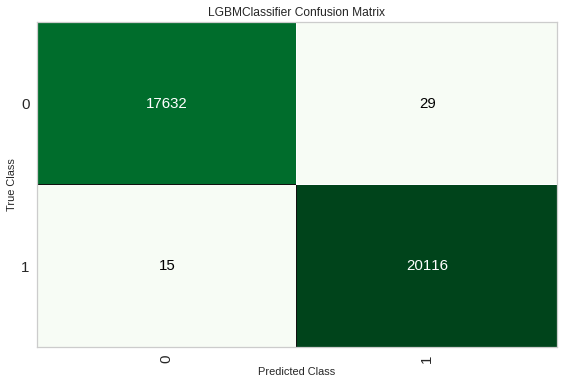

time: 833 ms (started: 2021-12-04 20:32:12 +00:00)


In [ ]:
'''
Indexes and names of the models 
LGBM:0
ET:1
RF:2
DT:3
KNN:4
Gradient Boosting Classifier:5
Ada boosting	:6
'''

plot_model(all20_ml_models[0],plot='confusion_matrix')

In [ ]:
#  this is the most important features that you can see 
# based on JS 
'''
Indexes and names of the models 
LGBM:0
ET:1
RF:2
DT:3
KNN:4
Gradient Boosting Classifier:5
Ada boosting	:6
'''
#plots that you can see:  'summary', 'correlation', 'reason', 'pdp', 'msa' or 'pfi'
# interpret_model(all20_ml_models[0],plot='summary')


'\nIndexes and names of the models \nLGBM:0\nET:1\nRF:2\nDT:3\nKNN:4\nGradient Boosting Classifier:5\nAda boosting\t:6\n'

## Scikit models

In [ ]:
import numpy.core.multiarray

# import river
import sklearn
import numpy as np
from sklearn import tree , svm 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB , CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from itertools import product
from sklearn.utils import resample
from sklearn.model_selection import KFold , RepeatedKFold
from sklearn.metrics import f1_score
from sklearn import impute
import statistics
from scipy import stats
from copy import deepcopy
import numpy.core.multiarray

# 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from lightgbm import LGBMClassifier

#
from sklearn.ensemble import RandomForestClassifier

time: 21.4 ms (started: 2021-12-06 01:40:48 +00:00)


In [ ]:
# data_x = total_data.iloc[:,:-1]
# data_y = total_data.iloc[:,-1:]
# # data_x
# X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.33, random_state=42)


time: 842 µs (started: 2021-12-06 00:38:07 +00:00)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from lightgbm import LGBMClassifier

LGBM = LGBMClassifier(class_weight='balanced')
tree2 = tree.DecisionTreeClassifier(class_weight='balanced')
# NB = GaussianNB()
# SVM = svm.SVC(C=1.0, kernel='rbf',degree=3)
SVM = svm.SVC(kernel='rbf', probability=True)
KNN = KNeighborsClassifier(n_neighbors=7,weights='uniform',algorithm='auto')

RFC = RandomForestClassifier(n_estimators=200,class_weight='balanced')
ETC = ExtraTreesClassifier(criterion = 'entropy')

# MLP = MLPClassifier(random_state=1, max_iter=300)
# MLP2 = MLPClassifier(random_state=1, max_iter=300 , hidden_layer_sizes=(100,4))





# MLP.fit(X_train,y_train)

time: 13.6 ms (started: 2021-12-06 01:40:50 +00:00)


## Report function and kfold

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def report(model2,x_train, y_train,x_test, y_test):
  print("********************** reporting the result of the model **************************")
  # print('The score is {0}'.format(model2.score(x_test,y_test)))
  print('The score for train data is {0}'.format(model2.score(x_train,y_train)))
  print('The score for test data is {0}'.format(model2.score(x_test,y_test)))
  # print('The score for validation data is {0}'.format(model2.score(x_validate,y_validate)))


  predictions_train = model2.predict(x_train)
  predictions_test = model2.predict(x_test)
  # predictions_validate = model2.predict(x_validate)

  print("\n\n--------------------------------------recall---------------------------------")

  print('the test recall for the class yes is {0}'.format(metrics.recall_score(y_test,predictions_test, pos_label=1)))
  print('the test recall for the class no is {0}'.format(metrics.recall_score(y_test,predictions_test, pos_label=0)))

  print('the training recall for the class yes is {0}'.format(metrics.recall_score(y_train,predictions_train, pos_label=1)))
  print('the training recall for the class no is {0}'.format(metrics.recall_score(y_train,predictions_train, pos_label=0)))

  # print('the validation recall for the class yes is {0}'.format(metrics.recall_score(y_test,predictions_test, pos_label='yes')))
  # print('the validation recall for the class no is {0}'.format(metrics.recall_score(y_test,predictions_test, pos_label='no')))

  print("\n\n--------------------------------------precision------------------------------")


  print('the test precision for the class yes is {0}'.format(metrics.precision_score(y_test,predictions_test, pos_label=1)))
  print('the test precision for the class no is {0}'.format(metrics.precision_score(y_test,predictions_test, pos_label=0)))

  print('the training precision for the class yes is {0}'.format(metrics.precision_score(y_train,predictions_train, pos_label=1)))
  print('the training precision for the class no is {0}'.format(metrics.precision_score(y_train,predictions_train, pos_label=0)))

  # print('the validation precision for the class yes is {0}'.format(metrics.precision_score(y_test,predictions_test, pos_label='yes')))
  # print('the validation precision for the class no is {0}'.format(metrics.precision_score(y_test,predictions_test, pos_label='no')))
  print("\n\n")
  print(classification_report(y_test, predictions_test))

  tn, fp, fn, tp = confusion_matrix(y_test, predictions_test).ravel()
  specificity = tn / (tn+fp)
  print("\n\nspecifity :",specificity)
  print("\n\n--------------------------------------confusion----------------------------")
  CM = metrics.confusion_matrix(y_test, predictions_test)
  print("The confusion Matrix:")
  print(CM)
  print('the accuracy score in {0}\n\n'.format(accuracy_score(y_test, predictions_test)))
  print("********************** plotting the confusion matrix & ROC curve **************************")
  plot_confusion_matrix(model2, x_test, y_test)
  metrics.plot_roc_curve(model2, x_test, y_test) 
  plt.show()


def KfolD(model, X , Y , K_split):
  kf = KFold(n_splits=K_split)
  Result_Train = 0
  R_test = 0
  Accu_train = 0
  Accu_test = 0
  list_test_accuracy = []
  for trainIndex, testIndex in kf.split(X):
    trainX, X_test = X.values[trainIndex], X.values[testIndex]
    trainY, Y_test = Y.values[trainIndex], Y.values[testIndex]

    model.fit(trainX, trainY)

    ypred = model.predict(trainX)
    erF = f1_score(trainY, ypred, average='micro')
    temp = accuracy_score(trainY,ypred)
    list_test_accuracy.append(temp)
    Result_Train += erF
    Accu_train += temp

    ypred = model.predict(X_test)
    erF = f1_score(Y_test, ypred, average='micro')
    temp2 = accuracy_score(Y_test, ypred)
    Accu_test += temp2
    R_test += erF

  Result_Train /= K_split
  R_test /= K_split
  Accu_test /= K_split
  Accu_train /= K_split
  print("average f1-score training result:", Result_Train)
  print("average f1-score testing result:", R_test)
  # print("average Accuracy training result:", Accu_train)
  # print("average Accuracy testing result:", Accu_test)



time: 97.3 ms (started: 2021-12-05 05:18:22 +00:00)


In [ ]:
mode = 'deploy'

if mode == 'validation':
  data_x = total_train.iloc[:,:-1]
  data_y = total_train.iloc[:,-1:]
  # # data_x
  X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.30, random_state=42)
  tree2.fit(X_train,y_train)
  # NB.fit(X_train,y_train)
  # SVM.fit(X_train,y_train)
  # KNN.fit(X_train,y_train)
  RFC.fit(X_train,y_train)
  ETC.fit(X_train,y_train)
  LGBM.fit(X_train,y_train)
  MLP2.fit(X_train,y_train)

if model == 'deploy' :
  data_x = train
  data_y = y_train
  print("DT")
  %time KfolD(tree2, data_x, data_y , 10)

  # %time KfolD(NB, data_x, data_y , 10)

  # %time KfolD(SVM, data_x, data_y , 10)

  # %time KfolD(KNN, data_x, data_y , 10)
  print("RFC")
  %time KfolD(RFC, data_x, data_y , 10)

  print("ETC")
  %time KfolD(ETC, data_x, data_y , 10)

  print("LGBM")
  %time KfolD(LGBM, data_x, data_y , 10)

  # %time KfolD(MLP, data_x, data_y , 10)

  # print("MLP2")
  # %time KfolD(MLP2, data_x, data_y , 10)

DT
average f1-score training result: 0.9998438819219289
average f1-score testing result: 0.9974994695237035
CPU times: user 26 s, sys: 23.5 ms, total: 26.1 s
Wall time: 26 s
RFC
average f1-score training result: 0.9998500560759123
average f1-score testing result: 0.9983647309641114
CPU times: user 6min 6s, sys: 1.04 s, total: 6min 7s
Wall time: 6min 6s
ETC
average f1-score training result: 0.9999100336517712
average f1-score testing result: 0.9984679263577284
CPU times: user 3min 33s, sys: 425 ms, total: 3min 34s
Wall time: 3min 34s
LGBM
average f1-score training result: 0.9998156571757718
average f1-score testing result: 0.9989600938029038
CPU times: user 46.2 s, sys: 311 ms, total: 46.5 s
Wall time: 25 s
time: 10min 31s (started: 2021-12-04 19:17:32 +00:00)


Metrics of offline model on trst data set train and test were splitted 70% to 30% to check the models 

********************** reporting the result of the model **************************
The score for train data is 0.9963585805084746
The score for test data is 0.9969086021505377


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9978186350888127
the test recall for the class no is 0.9962183880879225
the training recall for the class yes is 0.9967702245462935
the training recall for the class no is 0.9960474308300395


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9950279676817899
the test precision for the class no is 0.9983420180009475
the training precision for the class yes is 0.9947812739831159
the training precision for the class no is 0.9975550122249389



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4231
           1       1.00      1.00      1.00      3209

    accuracy            

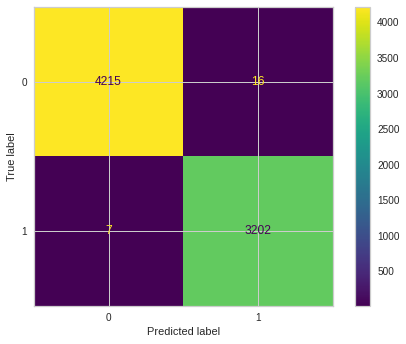

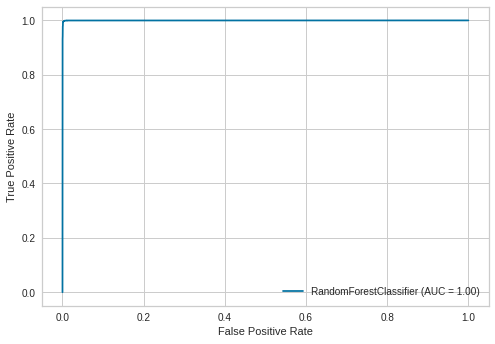

In [ ]:
report(RFC,X_train, y_train,X_test,y_test )


********************** reporting the result of the model **************************
The score for train data is 0.9954316737288136
The score for test data is 0.9971774193548387


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9953256466188843
the test recall for the class no is 0.9985818955329709
the training recall for the class yes is 0.9915410642879114
the training recall for the class no is 0.9983724715182516


--------------------------------------precision------------------------------
the test precision for the class yes is 0.998125
the test precision for the class no is 0.9964622641509434
the training precision for the class yes is 0.9978331527627302
the training precision for the class no is 0.9936364688186972



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4231
           1       1.00      1.00      1.00      3209

    accuracy                      

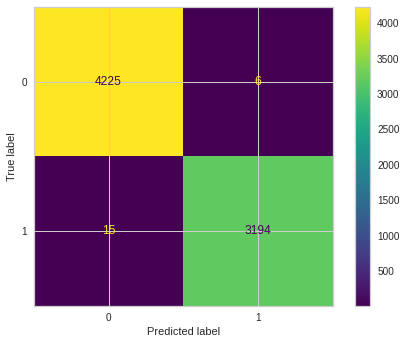

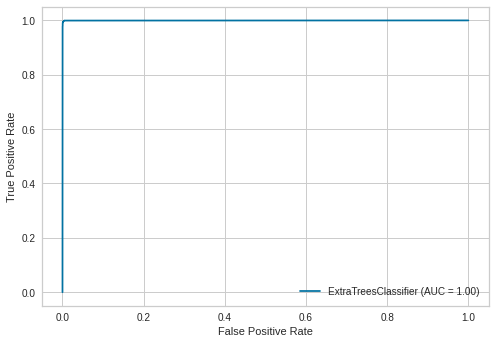

In [ ]:
report(ETC,X_train, y_train,X_test,y_test )


********************** reporting the result of the model **************************
The score for train data is 0.9949020127118644
The score for test data is 0.994489247311828


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9981302586475538
the test recall for the class no is 0.9917277239423304
the training recall for the class yes is 0.9969240233774224
the training recall for the class no is 0.9933736340385957


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9891908585546634
the test precision for the class no is 0.9985721085197525
the training precision for the class yes is 0.9912830708059336
the training precision for the class no is 0.9976649153531816



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4231
           1       0.99      1.00      0.99      3209

    accuracy             

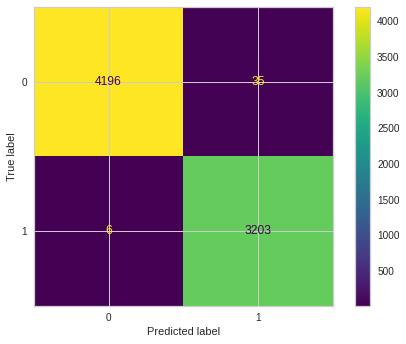

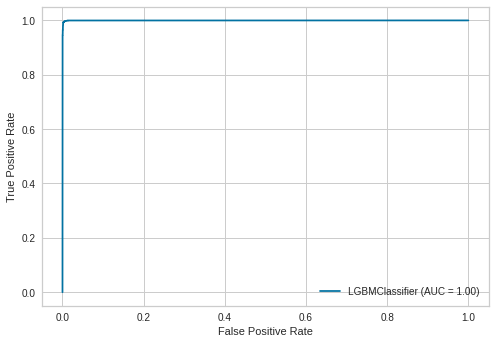

In [ ]:
report(LGBM,X_train, y_train,X_test,y_test )


## Offline Model:  LGBM, RFC, ETC

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier( estimators=[('lightgbm', LGBM), ('rf', RFC), ('etc', ETC)],
    voting='soft')

params = { 'rf__n_estimators': [20, 200]}

# لزومی ندارد
#grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
#grid = grid.fit(train, y_train)

time: 5.87 ms (started: 2021-12-06 01:40:57 +00:00)


********************** reporting the result of the model **************************
The score for train data is 0.9980137711864406
The score for test data is 0.9868279569892473


--------------------------------------recall---------------------------------
the test recall for the class yes is 0.9887815518853226
the test recall for the class no is 0.9853462538406996
the training recall for the class yes is 0.9984620116887112
the training recall for the class no is 0.997674959311788


--------------------------------------precision------------------------------
the test precision for the class yes is 0.9808346213292117
the test precision for the class no is 0.9914387633769323
the training precision for the class yes is 0.9969287469287469
the training precision for the class no is 0.9988361266294227



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4231
           1       0.98      0.99      0.98      3209

    accuracy             

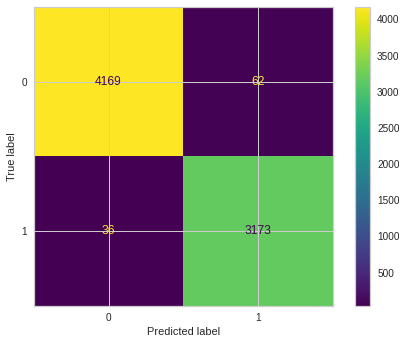

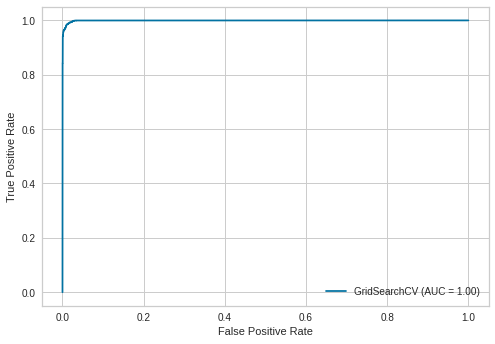

In [ ]:
# tested on with train test split on training data 
#  after the results train data will be used to train the model and metrics
#  of the model will be checked on test data in comparision to the online models 
report(grid,X_train, y_train,X_test,y_test )

In [ ]:
eclf.fit(train, y_train)

VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(class_weight='balanced')),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=200)),
                             ('etc',
                              ExtraTreesClassifier(criterion='entropy'))],
                 voting='soft')

time: 7.09 s (started: 2021-12-05 05:59:47 +00:00)


In [ ]:
# eclf2 = VotingClassifier( estimators=[ ('rf', RFC),('lightgbm', LGBM),
#                                       ('etc', ETC)],voting='soft')
# eclf2.fit(train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight='balanced',
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
  

time: 44.8 s (started: 2021-12-04 19:50:28 +00:00)


In [ ]:
# how to get prediction probabilities for voting classifier
eclf.predict_proba(test.iloc[:10,:])

array([[9.99982507e-01, 1.74928672e-05],
       [9.99982507e-01, 1.74928672e-05],
       [1.77512845e-03, 9.98224872e-01],
       [9.95961187e-01, 4.03881321e-03],
       [2.16195484e-01, 7.83804516e-01],
       [1.26499812e-05, 9.99987350e-01],
       [2.18302269e-02, 9.78169773e-01],
       [5.01535504e-02, 9.49846450e-01],
       [1.15774279e-05, 9.99988423e-01],
       [6.37938824e-02, 9.36206118e-01]])

time: 51.1 ms (started: 2021-12-04 19:52:18 +00:00)


# Generaring datastreams from Static Data

In [ ]:
stream = DataStream(test, pd.DataFrame(y_test))

time: 25.4 ms (started: 2021-12-06 02:09:45 +00:00)


In [ ]:
test.shape

(118814, 41)

time: 4.07 ms (started: 2021-12-06 02:09:49 +00:00)


# Main Algorithm

In [ ]:
class offline_and_online_ensembles():
  def __init__(self, online_model, offline_model, streaming_data, pretrain_X, pretrain_y, is_bag):
    self.offline_classifier = offline_model
    self.online_classifier = online_model
    self.stream = streaming_data
    self.is_bag = is_bag
    # Pre training the offline and online models
    # Temporarily, use 100 data for pr-training
    #self.pretrain_X = pretrain_X.iloc[0:200].values.reshape(-1, pretrain_X.shape[1])
    #self.pretrain_y = pretrain_y.iloc[0:200].values.reshape(-1,)
    self.pretrain_X = pretrain_X.values.reshape(-1, pretrain_X.shape[1])
    self.pretrain_y = pretrain_y.values.reshape(-1,)
    self.n_seen = 0
    # online setting 
    self.max_samples = 118000
    self.window_size = 5000
    self.decay_factor = 5000
    self.window = queue.Queue(maxsize=self.window_size)
    self.online_window_true_label = queue.Queue(maxsize=self.window_size)
    self.online_window_pred_label = queue.Queue(maxsize=self.window_size)
    self.online_pred_proba = queue.Queue(maxsize=self.window_size)
    # online setting metrics
    ## recall
    self.online_recall = {}
    for i in range(0, 2):
      self.online_recall[str(i)] = []
    ## f1 score  
    self.online_f1 = {}
    for i in range(0, 2):
      self.online_f1[str(i)] = []
    ## precision
    self.online_precision = {}
    for i in range(0, 2):
      self.online_precision[str(i)] = []
    ## auc  
    self.online_auc = []
    ## confusion matrix
    self.online_fn = []
    ## accuracy
    self.online_acc = []
    ## kappa
    self.online_kappa = []

    ######################
    # offline setting
    self.offline_X = [] # keeps data seen so far
    self.offline_y = []
    self.offline_pred_proba = []
    # offline setting metrics
    ## recall
    self.offline_recall = {}
    for i in range(0, 2):
      self.offline_recall[str(i)] = []
    ## f1 score  
    self.offline_f1 = {}
    for i in range(0, 2):
      self.offline_f1[str(i)] = []
    ## precision
    self.offline_precision = {}
    for i in range(0, 2):
      self.offline_precision[str(i)] = []
    ## auc  
    self.offline_auc = []
    ## confusion matrix
    self.offline_fn = []
    ## accuracy
    self.offline_acc = []
    ## kappa
    self.offline_kappa = []
    # timer
    self.timer = {}
    self.timer["online"] = []
    self.timer["offline"] = []

  # Function for pretraining the classifier
  def pre_train(self):
    # online pre-train
    online_start_time = time.time()
    if self.is_bag == True:
      for model in self.online_classifier:
        model.partial_fit(self.pretrain_X, self.pretrain_y, classes=[0, 1])
    else:
      self.online_classifier.partial_fit(self.pretrain_X, self.pretrain_y, classes=[0, 1])
    self.timer["online"].append(time.time() - online_start_time)
    # offline pre-train
    offline_start_time = time.time()
    self.offline_classifier.fit(self.pretrain_X, self.pretrain_y)
    self.timer["offline"].append(time.time() - offline_start_time)
    return None


  def compute_scores(self):
    # online setting
    on_cls_rep = classification_report(list(self.online_window_true_label.queue), list(self.online_window_pred_label.queue), output_dict=True)
    #print(list(self.online_window_pred_label.queue))
    #print(on_cls_rep)
    for i in range(0, 2):
      try:
        self.online_recall[str(i)].append(on_cls_rep[str(i)]['recall'])
        self.online_precision[str(i)].append(on_cls_rep[str(i)]['precision'])
        self.online_f1[str(i)].append(on_cls_rep[str(i)]['f1-score'])
      except:
        self.online_recall[str(i)].append(0.12345)
        self.online_precision[str(i)].append(0.12345)
        self.online_f1[str(i)].append(0.12345)
    ## auc    
    #self.online_auc.append(roc_auc_score(list(self.online_window_true_label.queue), list(self.online_pred_proba.queue)))
    ## false negative
    self.online_fn.append(confusion_matrix(list(self.online_window_true_label.queue), list(self.online_window_pred_label.queue)).ravel()[2])
    ## accuracy
    self.online_acc.append(accuracy_score(list(self.online_window_true_label.queue), list(self.online_window_pred_label.queue)))
    ## kappa
    self.online_kappa.append(cohen_kappa_score(list(self.online_window_true_label.queue), list(self.online_window_pred_label.queue)))

    # offline setting
    off_cls_rep = classification_report(self.offline_y, self.offline_pred, output_dict=True)
    for i in range(0, 2):
      try:
        self.offline_recall[str(i)].append(off_cls_rep[str(i)]['recall'])
        self.offline_precision[str(i)].append(off_cls_rep[str(i)]['precision'])
        self.offline_f1[str(i)].append(off_cls_rep[str(i)]['f1-score'])
      except:
        self.offline_recall[str(i)].append(0)
        self.offline_precision[str(i)].append(0)
        self.offline_f1[str(i)].append(0)
    ## auc
    #self.offline_auc.append(roc_auc_score(self.offline_y, self.offline_pred_proba))
    ## false negative
    self.offline_fn.append(confusion_matrix(self.offline_y, self.offline_pred).ravel()[2])
    ## accuracy
    self.offline_acc.append(accuracy_score(self.offline_y, self.offline_pred))
    ## kappa
    self.offline_kappa.append(cohen_kappa_score(self.offline_y, self.offline_pred))
    return None


  def store(self):
    # Store the pre training data for the offline setting 
    for i in self.pretrain_X:
      obj.offline_X.append(i)
    for i in self.pretrain_y:
      obj.offline_y.append(i)
    return None


  def online_bagging(self, instance, label):
    predictions = []
    prediction_probabilities = []
    for model in self.online_classifier:
      predictions.append(model.predict(instance)[0])
      #prediction_probabilities.append(model.predict_proba(instance))
    majority_pred = Counter(predictions).most_common()[0][0]
    #pred_proba = Counter(predictions).most_common()[0][0]
    for i in range(len(self.online_classifier)):
      k = np.random.poisson(1, size=1)
      for j in range(int(k)):
        self.online_classifier[i].partial_fit(instance, label)
    return majority_pred
 

  # Main function of this class
  def evaluation(self):
    # pre_training
    self.pre_train()
    self.store()
    ### First iteration ###
    for i in range(self.window_size):  
      self.n_seen += 1    
      nxtItem = self.stream.next_sample(1)
      #transformed_X = min_max_scaler.fit_transform(nxtItem[0])
      # online window
      self.window.put([nxtItem[0], nxtItem[1]])
      # offline data
      self.offline_X.append(nxtItem[0].reshape(-1,))
      self.offline_y.append(nxtItem[1][0])

    ###############  Test then Train ###################
    # online setting
    # test on the test set (predict)
    online_start_time = time.time()
    for element in list(self.window.queue):
      # If bag is true, use the customized bagging algorithm, else use the adaptive random forest
      if self.is_bag == True:
        # online bagging algorithm
        pred = self.online_bagging(element[0], element[1])
        self.online_window_pred_label.put(pred)
        #self.online_pred_proba.put(proba)
      else:
        # online adaptive random forest
        self.online_window_pred_label.put(self.online_classifier.predict(element[0], element[1]))
        # predict proba
        #self.online_pred_proba.put(np.amax(self.online_classifier.predict_proba(element[0]))) 
        # partial fit the classifier for each coming instance
        self.online_classifier.partial_fit(element[0], element[1].reshape(-1,))
      # true label
      self.online_window_true_label.put(element[1])
    self.timer["online"].append(time.time() - online_start_time)
      

    # offline setting
      # test on the test set (predict)
    offline_start_time = time.time()
    self.offline_pred = self.offline_classifier.predict(self.offline_X)
    #self.offline_pred_proba = [np.amax(i) for i in self.offline_classifier.predict_proba(self.offline_X)]
      # partial fit the classifier for each coming instance
    #self.offline_classifier.fit( np.array(self.offline_X).reshape(-1, train.shape[1]), np.array(self.offline_y).reshape(-1,) )
    self.offline_classifier.fit(self.offline_X, self.offline_y)
    self.timer["offline"].append(time.time() - offline_start_time)
    # update scores of each window at the end of window_size
    self.compute_scores()

    iter = 1
    print("iter = ", iter)

    ########## Second part of the classifier ##########
    while self.stream.has_more_samples() and (self.n_seen + self.decay_factor < self.max_samples): 
      with self.online_window_true_label.mutex: self.online_window_true_label.queue.clear()
      with self.online_window_pred_label.mutex: self.online_window_pred_label.queue.clear()
      #with self.online_pred_proba.mutex: self.online_pred_proba.queue.clear()

      for i in range(self.decay_factor):
        self.window.get()
        # online window
        nxtItem = self.stream.next_sample(1)
        #transformed_X = min_max_scaler.fit_transform(nxtItem[0])
        # online window
        self.window.put([nxtItem[0], nxtItem[1]])
        # offline data
        self.offline_X.append(nxtItem[0].reshape(-1,))
        self.offline_y.append(nxtItem[1][0])

      ###############  Test then Train ###################
      # online setting
      # test on the test set (predict)
      online_start_time = time.time()
      for element in list(self.window.queue):
        self.n_seen += 1
        if self.is_bag == True:
          # online bagging algorithm
          pred = self.online_bagging(element[0], element[1])
          self.online_window_pred_label.put(pred)
          #self.online_pred_proba.put(proba)
        else:
          self.online_window_pred_label.put(self.online_classifier.predict(element[0], element[1]))
          #self.online_pred_proba.put(np.amax(self.online_classifier.predict_proba(element[0])))
          # partial fit the classifier for each coming instance
          self.online_classifier.partial_fit(element[0], element[1].reshape(-1,))
        self.online_window_true_label.put(element[1])
      self.timer["online"].append(time.time() - online_start_time)
      # offline setting
        # test on the test set (predict)
      offline_start_time = time.time()
      self.offline_pred = self.offline_classifier.predict(self.offline_X)
      #self.offline_pred_proba = [np.amax(i) for i in self.offline_classifier.predict_proba(self.offline_X)]
        # partial fit the classifier for each coming instance
      self.offline_classifier.fit(self.offline_X, self.offline_y)
      self.timer["offline"].append(time.time() - offline_start_time)
      # update scores of each window at the end of window_size
      self.compute_scores()

      iter += 1
      print("iter = ", iter)      
    return

time: 685 ms (started: 2021-12-06 02:10:08 +00:00)


###Defining Online Classifier


Adaptive random forest or bagging model -- use one of these

If you only use adaptive random forest, then is_bag should be false, otherwise, it should be true.

In [ ]:
# adaptive random forest:
is_bag = False
arf = AdaptiveRandomForestClassifier(n_estimators=20, drift_detection_method=None, warning_detection_method=None)
online_model = arf

time: 2.25 ms (started: 2021-12-06 00:43:45 +00:00)


In [ ]:
# bagging model: hoeffding tree, knn, and arf
is_bag = True
ht = HoeffdingTreeClassifier()
knn = KNNClassifier(n_neighbors=3)
arf = AdaptiveRandomForestClassifier(n_estimators=20, drift_detection_method=None, warning_detection_method=None)
bagging_models = []
bagging_models.append(ht)
bagging_models.append(knn)
bagging_models.append(arf)
online_model = bagging_models

time: 5.78 ms (started: 2021-12-06 02:10:10 +00:00)


### Defining Offline Classifier

In [ ]:
offline_model = eclf

time: 1.18 ms (started: 2021-12-06 02:10:12 +00:00)


In [ ]:
obj.offline_fn

[22,
 23,
 25,
 30,
 40,
 40,
 53,
 47,
 44,
 49,
 58,
 52,
 63,
 59,
 57,
 64,
 67,
 71,
 85,
 80,
 84,
 83,
 90]

time: 7.78 ms (started: 2021-12-06 04:04:24 +00:00)


In [ ]:
obj.online_fn

[18,
 21,
 23,
 30,
 26,
 14,
 26,
 25,
 27,
 23,
 24,
 31,
 32,
 27,
 22,
 27,
 29,
 37,
 31,
 24,
 21,
 21,
 16]

time: 5.22 ms (started: 2021-12-06 04:04:33 +00:00)


In [ ]:
# define an object of the class
obj = offline_and_online_ensembles(online_model, offline_model, stream, train, y_train, is_bag)
obj.evaluation()

iter =  1
iter =  2
iter =  3
iter =  4
iter =  5
iter =  6
iter =  7
iter =  8
iter =  9
iter =  10
iter =  11
iter =  12
iter =  13
iter =  14
iter =  15
iter =  16
iter =  17
iter =  18
iter =  19
iter =  20
iter =  21
iter =  22
iter =  23
time: 50min 38s (started: 2021-12-06 02:10:13 +00:00)


In [ ]:
np.mean(obj.timer["offline"])

28.267862776915234

time: 4.27 ms (started: 2021-12-06 03:04:26 +00:00)


In [ ]:
np.mean(obj.timer["online"])

97.70976954698563

time: 4.13 ms (started: 2021-12-06 03:04:26 +00:00)


# Metrics

In [ ]:
obj.online_recall

{'0': [0.9562135112593828,
  0.9589270746018441,
  0.9659663865546219,
  0.9654752233956133,
  0.9662218515429525,
  0.963151207115629,
  0.9729617304492513,
  0.9671717171717171,
  0.9710264900662252,
  0.9719169719169719,
  0.9623273336123901,
  0.9766775777414075,
  0.9759183673469388,
  0.9745621351125938,
  0.9745762711864406,
  0.9821645723550871,
  0.9810699588477366,
  0.9818104906937394,
  0.9833468724614135,
  0.9798767967145791,
  0.9828810020876827,
  0.9784142797841427,
  0.9741379310344828],
 '1': [0.9930822444273636,
  0.9919663351185922,
  0.9912213740458016,
  0.9881796690307328,
  0.9900076863950807,
  0.9946949602122016,
  0.9899845916795069,
  0.9904725609756098,
  0.9895510835913313,
  0.9909555642941408,
  0.9908081194944466,
  0.9878716744913928,
  0.9874509803921568,
  0.9896233666410453,
  0.9916666666666667,
  0.9893407027240426,
  0.988715953307393,
  0.9859635811836115,
  0.987785657998424,
  0.9906432748538012,
  0.9919385796545106,
  0.9918950212273253,
  

time: 5.11 ms (started: 2021-12-06 03:04:21 +00:00)


In [ ]:
obj.online_precision

{'0': [0.9922111639982691,
  0.9909051537462105,
  0.9900947459086994,
  0.9875363523057749,
  0.988903115663679,
  0.9938811188811189,
  0.9890063424947146,
  0.9892380542402066,
  0.988621997471555,
  0.990460389879718,
  0.9896685320705984,
  0.9871794871794872,
  0.9867932315311597,
  0.9885786802030457,
  0.9905254091300603,
  0.9889795918367347,
  0.987981765437215,
  0.9843087362171332,
  0.9873572593800979,
  0.9900414937759336,
  0.9911578947368421,
  0.9911690496215307,
  0.9933026370866471],
 '1': [0.9609520267757531,
  0.9635823114083983,
  0.9697535474234503,
  0.9672194369456228,
  0.9695144900263455,
  0.9679203539823009,
  0.9753320683111955,
  0.9708629062383265,
  0.9733536353254663,
  0.9733487833140209,
  0.9663802764288383,
  0.9779240898528273,
  0.9771051610399689,
  0.9768588770864947,
  0.977595220313667,
  0.9827450980392157,
  0.9822187862388867,
  0.9837244511733535,
  0.9839089481946625,
  0.981081081081081,
  0.9843809523809524,
  0.9801678108314263,
  0.9

time: 5.08 ms (started: 2021-12-06 03:04:21 +00:00)


In [ ]:
obj.online_f1

{'0': [0.973879804629433,
  0.9746538871139512,
  0.9778817524457677,
  0.9763811871020743,
  0.977430921746467,
  0.9782748978274898,
  0.98091843153701,
  0.9780804426473717,
  0.9797452495301734,
  0.981101068200493,
  0.9758064516129031,
  0.9819004524886878,
  0.9813256720705931,
  0.9815203695926082,
  0.9824861170439982,
  0.9855603009965427,
  0.9845137311583729,
  0.9830580262600592,
  0.9853479853479853,
  0.9849329205366357,
  0.9870020964360587,
  0.984750365573428,
  0.9836269430051813],
 '1': [0.9767529767529768,
  0.9775683317624883,
  0.9803699509248773,
  0.9775872149678426,
  0.9796539266020157,
  0.9811250233601198,
  0.9826037086599121,
  0.9805697038294661,
  0.9813855306083284,
  0.9820732657833203,
  0.9784417549167929,
  0.9828727131179448,
  0.9822508289448021,
  0.9831996945399006,
  0.9845806694245958,
  0.986031870942357,
  0.9854566608493309,
  0.984842743463433,
  0.9858434919386552,
  0.985838991270611,
  0.9881453154875718,
  0.9859965470938039,
  0.9847

time: 5.11 ms (started: 2021-12-06 03:04:21 +00:00)


In [ ]:
obj.online_fn

[18,
 21,
 23,
 30,
 26,
 14,
 26,
 25,
 27,
 23,
 24,
 31,
 32,
 27,
 22,
 27,
 29,
 37,
 31,
 24,
 21,
 21,
 16]

time: 5.2 ms (started: 2021-12-06 03:04:21 +00:00)


In [ ]:
obj.online_acc

[0.9754,
 0.9762,
 0.9792,
 0.977,
 0.9786,
 0.9798,
 0.9818,
 0.9794,
 0.9806,
 0.9816,
 0.9772,
 0.9824,
 0.9818,
 0.9824,
 0.9836,
 0.9858,
 0.985,
 0.984,
 0.9856,
 0.9854,
 0.9876,
 0.9854,
 0.9842]

time: 4.64 ms (started: 2021-12-06 03:04:22 +00:00)


In [ ]:
obj.online_kappa

[0.9506477740460897,
 0.9522335894683334,
 0.9582573402861619,
 0.9539739750444491,
 0.9570900544210398,
 0.9594086164977529,
 0.9635243641214423,
 0.958654808919386,
 0.9611336598212757,
 0.9631774528179095,
 0.9542562034607028,
 0.9647741188405946,
 0.963577563779288,
 0.9647216991055989,
 0.967068696305911,
 0.9715925004201109,
 0.9699707394885576,
 0.9679008160896517,
 0.971191592554371,
 0.9707726431940296,
 0.9751478104018438,
 0.9707480391569152,
 0.9683640413039076]

time: 4.09 ms (started: 2021-12-06 03:04:22 +00:00)


In [ ]:
obj.offline_recall

{'0': [0.9987346348517715,
  0.9991044147086714,
  0.9989701338825953,
  0.9986568166554735,
  0.9990847380062543,
  0.9988104817548893,
  0.9991609384580631,
  0.9987710937265833,
  0.9993571648173509,
  0.9991892457370017,
  0.9991138461538461,
  0.9990712577491931,
  0.9991871526175883,
  0.9990608760982532,
  0.9988265011834437,
  0.9989951463673593,
  0.9991662739696233,
  0.9990441099794918,
  0.9992,
  0.9990229839032594,
  0.9990128027147925,
  0.9989440652002558,
  0.9990814495873699],
 '1': [0.9987850002761363,
  0.9988900149606679,
  0.9989289233537552,
  0.998840758916496,
  0.9985955549313578,
  0.9987146529562982,
  0.9984280460315578,
  0.9987066593285636,
  0.9988695920254855,
  0.9988183374731714,
  0.9986841508235401,
  0.9988849337393318,
  0.9987190956408588,
  0.9988606959409879,
  0.9989527064270753,
  0.998876384767991,
  0.9988744981437618,
  0.9988578782272983,
  0.998686305117228,
  0.9988107272402925,
  0.9987978189000043,
  0.9988546036652682,
  0.9988004478

time: 6.85 ms (started: 2021-12-06 03:04:22 +00:00)


In [ ]:
obj.offline_precision

{'0': [0.9986744592396216,
  0.9987887086580999,
  0.998829861923707,
  0.9987406598942155,
  0.9984754935589603,
  0.9986008604708104,
  0.9982910943444896,
  0.9985915070874165,
  0.9987709497206704,
  0.9987190881999268,
  0.9985730804241395,
  0.9987929713794944,
  0.9986167526622022,
  0.9987690638626359,
  0.9988662357036301,
  0.9987868448488295,
  0.9987861219313343,
  0.9987663759252181,
  0.9985842064060496,
  0.9987190572261184,
  0.9987047031611411,
  0.9987658176086601,
  0.9987087703189337],
 '1': [0.9988401634817188,
  0.9991793386434951,
  0.9990573313908647,
  0.9987635717321587,
  0.9991568593008958,
  0.9989072443273125,
  0.9992282347353736,
  0.9988715803379754,
  0.9994087859548106,
  0.9992520929334845,
  0.9991828581804976,
  0.9991420359486938,
  0.9992473249521949,
  0.9991308042957583,
  0.998915999118101,
  0.9990693264030344,
  0.9992269946897896,
  0.9991150300085279,
  0.9992577243064361,
  0.9990929233148448,
  0.9990837902452293,
  0.9990200408546348,
 

time: 4.52 ms (started: 2021-12-06 03:04:22 +00:00)


In [ ]:
obj.offline_f1

{'0': [0.9987045461392462,
  0.9989465367395312,
  0.9988999929786786,
  0.9986987365151325,
  0.9987800228745711,
  0.9987056601133422,
  0.9987258270027903,
  0.9986812923335133,
  0.9990639712764917,
  0.9989541116485815,
  0.9988433900974504,
  0.9989320951828207,
  0.9989018712114557,
  0.9989149486687255,
  0.998846368048373,
  0.9988909847486706,
  0.9989761617845591,
  0.9989052236471693,
  0.9988920082974415,
  0.9988709974457317,
  0.9988587291795188,
  0.9988549334523013,
  0.9988950751922856],
 '1': [0.9988125811172783,
  0.9990346558548122,
  0.9989931232459992,
  0.9988021638330759,
  0.9988761282618621,
  0.9988109393579074,
  0.9988279801201692,
  0.998789113025291,
  0.999139116245005,
  0.9990351681219547,
  0.9989334422583793,
  0.9990134683023076,
  0.9989831404689756,
  0.9989957318604067,
  0.9989343524353721,
  0.998972846269325,
  0.9990507153238068,
  0.9989864375693808,
  0.9989719329978589,
  0.9989518053480229,
  0.9989407841060362,
  0.9989373154103066,
  0

time: 4.61 ms (started: 2021-12-06 03:04:22 +00:00)


In [ ]:
obj.offline_fn

[22,
 23,
 25,
 30,
 40,
 40,
 53,
 47,
 44,
 49,
 58,
 52,
 63,
 59,
 57,
 64,
 67,
 71,
 85,
 80,
 84,
 83,
 90]

time: 5.35 ms (started: 2021-12-06 03:04:22 +00:00)


In [ ]:
obj.offline_acc

[0.9987609140420136,
 0.998992519456968,
 0.9989486164239536,
 0.9987525903868981,
 0.9988300458841379,
 0.9987605312965847,
 0.9987790365207178,
 0.9987375005379969,
 0.9991031150020749,
 0.998996273665985,
 0.9988902400151116,
 0.9989743932755872,
 0.9989440672417981,
 0.9989569019989368,
 0.9988921043332092,
 0.9989334840432805,
 0.9990148470397461,
 0.9989473948021352,
 0.9989334659150141,
 0.9989129010123128,
 0.9989012865340787,
 0.9988976614675419,
 0.998935751159271]

time: 5.29 ms (started: 2021-12-06 03:04:22 +00:00)


In [ ]:
obj.offline_kappa

[0.9975171272585901,
 0.9979811926405368,
 0.9978931162341852,
 0.9975009003522616,
 0.997656151337286,
 0.9975165994963763,
 0.997553807549664,
 0.9974704053775818,
 0.9982030876637458,
 0.9979892798732559,
 0.9977768325060516,
 0.9979455635219516,
 0.9978850118400813,
 0.9979106805703889,
 0.9977807204845561,
 0.9978638310395047,
 0.9980268771745973,
 0.9978916612542738,
 0.9978639414836096,
 0.9978228028405394,
 0.9977995133341316,
 0.9977922488789199,
 0.9978686138867976]

time: 4.6 ms (started: 2021-12-06 03:04:22 +00:00)


In [ ]:
obj.online_recall

{'0': [0.9562135112593828,
  0.9589270746018441,
  0.9659663865546219,
  0.9654752233956133,
  0.9662218515429525,
  0.963151207115629,
  0.9729617304492513,
  0.9671717171717171,
  0.9710264900662252,
  0.9719169719169719,
  0.9623273336123901,
  0.9766775777414075,
  0.9759183673469388,
  0.9745621351125938,
  0.9745762711864406,
  0.9821645723550871,
  0.9810699588477366,
  0.9818104906937394,
  0.9833468724614135,
  0.9798767967145791,
  0.9828810020876827,
  0.9784142797841427,
  0.9741379310344828],
 '1': [0.9930822444273636,
  0.9919663351185922,
  0.9912213740458016,
  0.9881796690307328,
  0.9900076863950807,
  0.9946949602122016,
  0.9899845916795069,
  0.9904725609756098,
  0.9895510835913313,
  0.9909555642941408,
  0.9908081194944466,
  0.9878716744913928,
  0.9874509803921568,
  0.9896233666410453,
  0.9916666666666667,
  0.9893407027240426,
  0.988715953307393,
  0.9859635811836115,
  0.987785657998424,
  0.9906432748538012,
  0.9919385796545106,
  0.9918950212273253,
  

time: 4.39 ms (started: 2021-12-06 03:04:22 +00:00)


# Plot



1.   Online: Recall for class 0 and class 1
2.   Offline: Recall for class 0 and class 1
3.   Recall Class 0: Online and Offline
4.   Recall Class 1: Online and Offline
----------------------------------------------
5.   Online: Precision for class 0 and class 1
6.   Offline: Recall for class 0 and class 1
7.   Precision Class 0: Online and Offline
8.   Precision Class 1: Online and Offline
-----------------------------------------------
9.   Online: f1-score for class 0 and class 1
10.  Offline: f1-score for class 0 and class 1
11.  f1-score Class 0: Online and Offline
12.  f1-score Class 1: Online and Offline
-----------------------------------------------
13.  Online: Accuracy 
14.  Offline: Accuracy
-----------------------------------------------
15.  Online: Kappa
16.  Offline: Kappa
-----------------------------------------------
17.  Online: false negative
18.  Offline:  false negative



In [ ]:
# plot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot

def plot_metrics(metric0,label_mectric0, metric1, label_mectric1, y_label, x_label):
  figure(figsize=(25, 6), dpi=80)
  plt.plot(np.array(metric0))
  plt.plot(np.array(metric1))
  plt.plot(metric0, label=label_mectric0, color='orange')
  plt.plot(metric1, label=label_mectric1, color='cyan')
  plt.ylabel(y_label)
  plt.xlabel(x_label)
  plt.legend(fontsize=14)
  plt.show()

time: 10.5 ms (started: 2021-12-06 04:04:57 +00:00)


## Recall

1. Online: Recall for class 0 and class 1

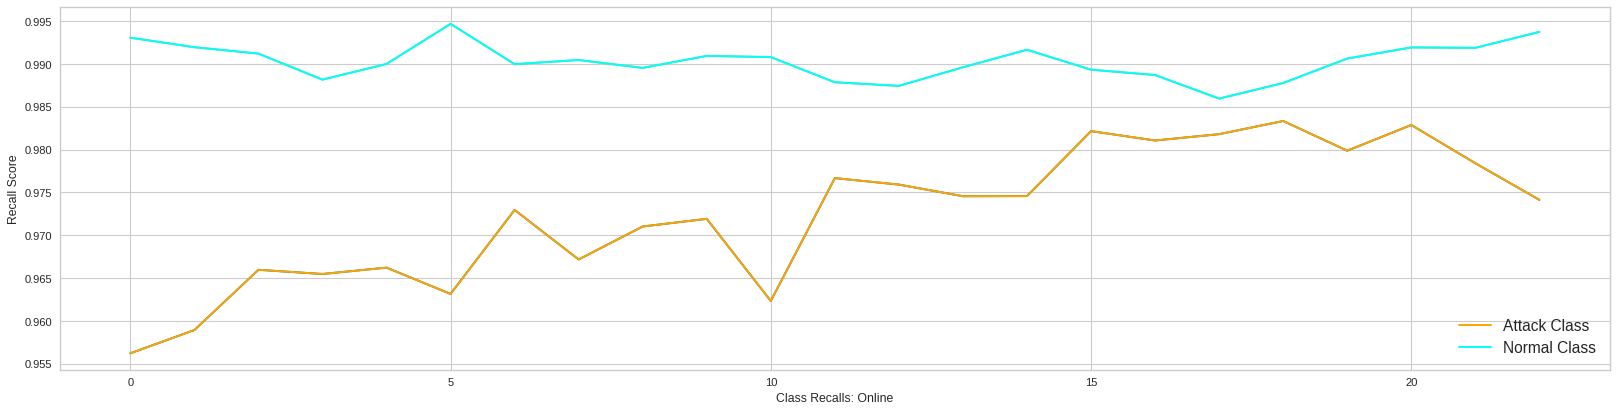

time: 276 ms (started: 2021-12-06 03:05:58 +00:00)


In [ ]:
plot_metrics(obj.online_recall["0"],'Attack Class',  obj.online_recall["1"], 'Normal Class', 'Recall Score', 'Class Recalls: Online')

2. Offline: Recall for class 0 and class 1

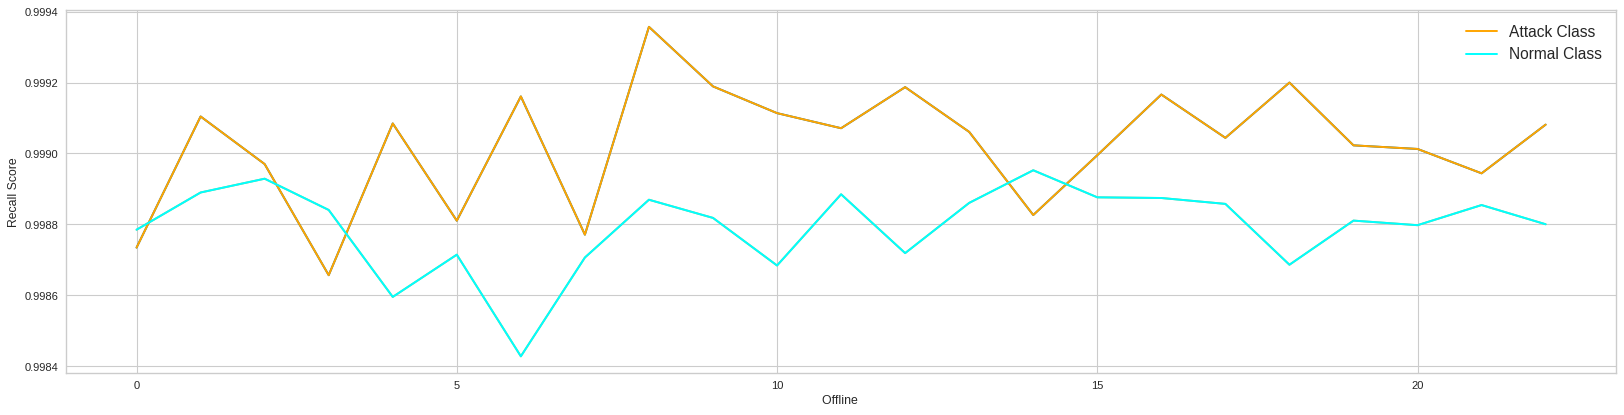

time: 267 ms (started: 2021-12-06 03:05:58 +00:00)


In [ ]:
plot_metrics(obj.offline_recall["0"],'Attack Class',  obj.offline_recall["1"], 'Normal Class', 'Recall Score', 'Offline ')

3. Recall Class 0: Online and Offline

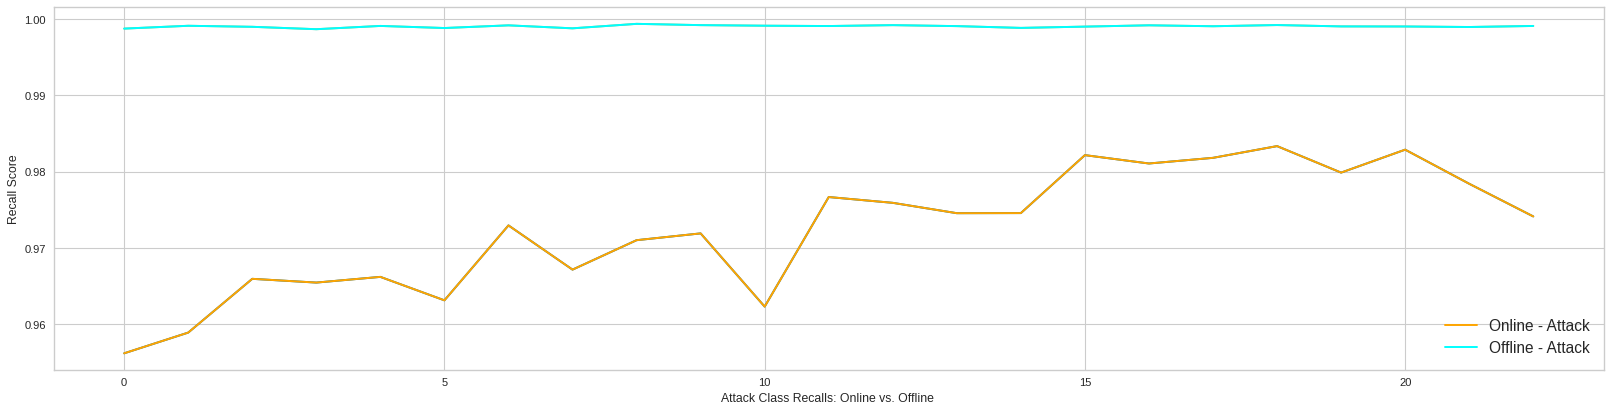

time: 271 ms (started: 2021-12-06 03:05:59 +00:00)


In [ ]:
plot_metrics(obj.online_recall["0"],'Online - Attack',  obj.offline_recall["0"], 'Offline - Attack', 'Recall Score', 'Attack Class Recalls: Online vs. Offline ')

4. Recall Class 1: Online and Offline

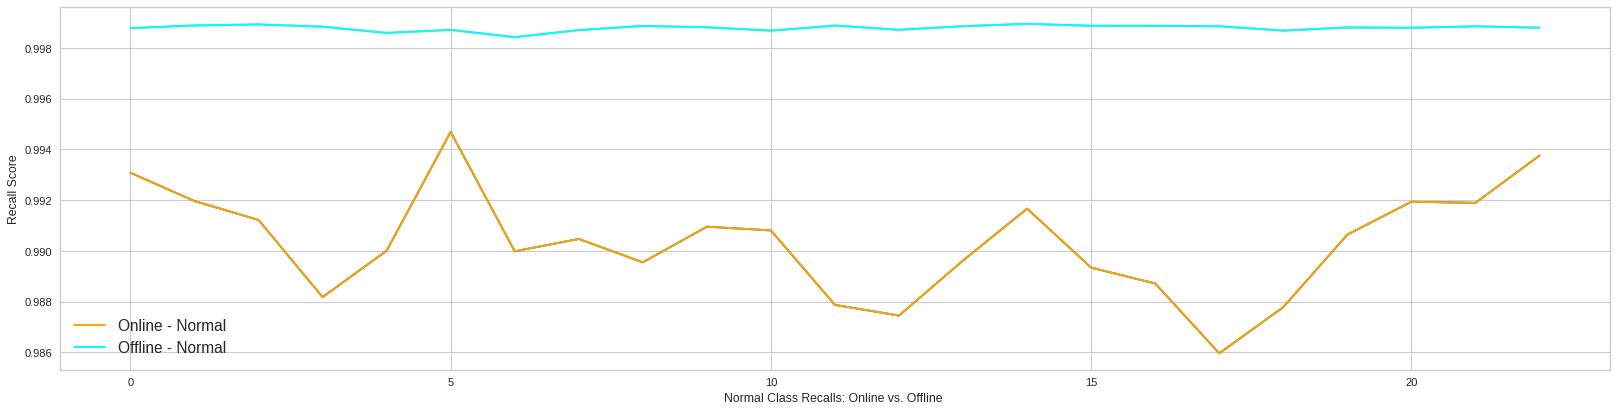

time: 261 ms (started: 2021-12-06 03:05:59 +00:00)


In [ ]:
plot_metrics(obj.online_recall["1"],'Online - Normal',  obj.offline_recall["1"], 'Offline - Normal', 'Recall Score', 'Normal Class Recalls: Online vs. Offline ')

## Precision

5. Online: Precision for class 0 and class 1

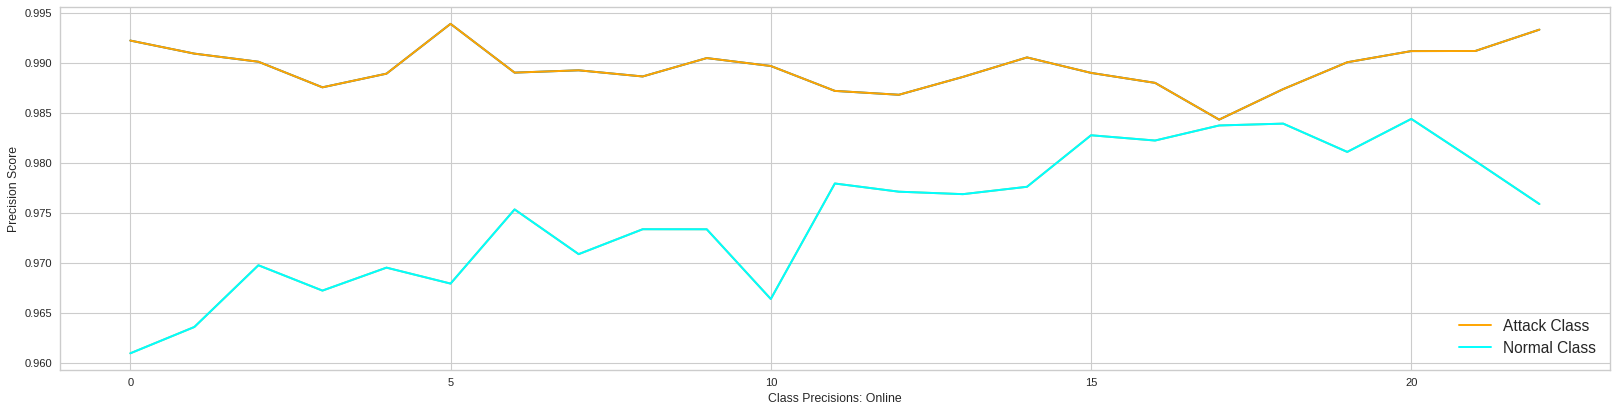

time: 271 ms (started: 2021-12-06 03:05:59 +00:00)


In [ ]:
plot_metrics(obj.online_precision["0"],'Attack Class',  obj.online_precision["1"], 'Normal Class', 'Precision Score', 'Class Precisions: Online')

6. Offline: Precision for class 0 and class 1

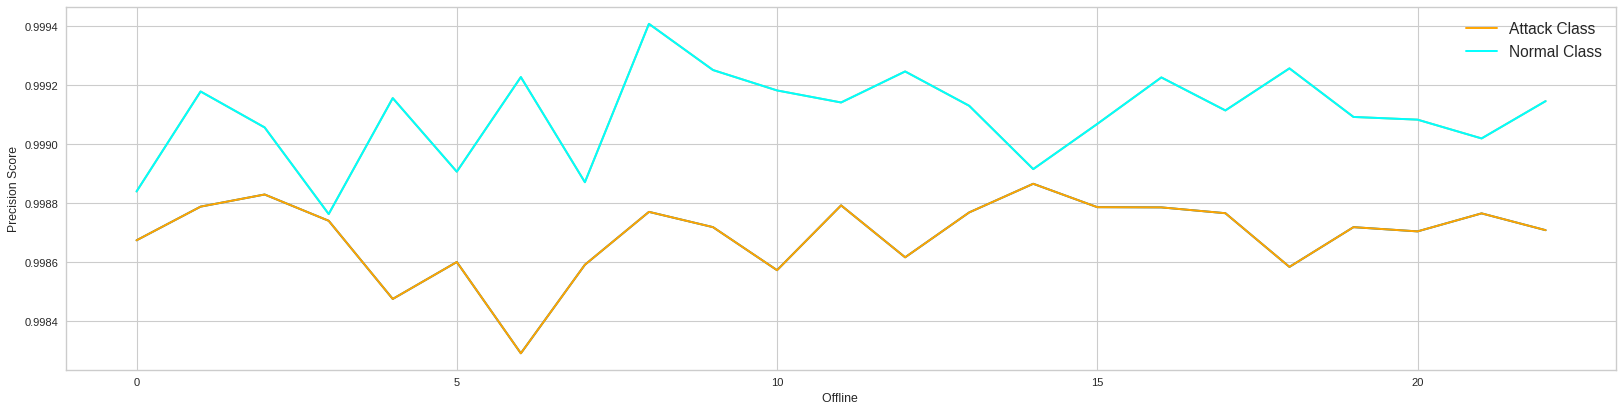

time: 277 ms (started: 2021-12-06 03:05:59 +00:00)


In [ ]:
plot_metrics(obj.offline_precision["0"],'Attack Class',  obj.offline_precision["1"], 'Normal Class', 'Precision Score', 'Offline ')

7. Precision Class 0: Online and Offline

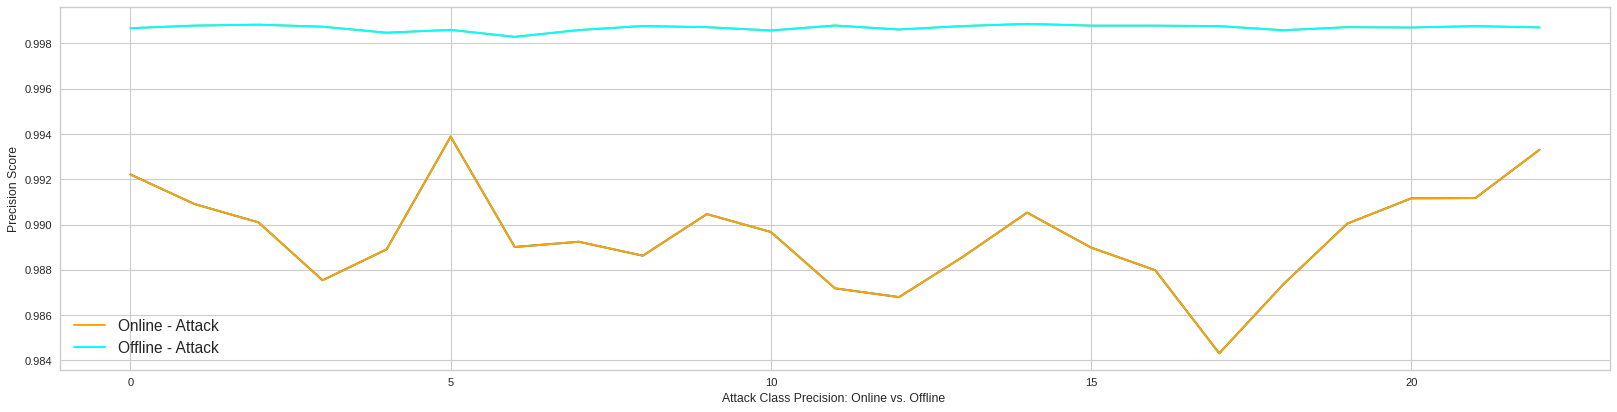

time: 272 ms (started: 2021-12-06 03:06:00 +00:00)


In [ ]:
plot_metrics(obj.online_precision["0"],'Online - Attack',  obj.offline_precision["0"], 'Offline - Attack', 'Precision Score', 'Attack Class Precision: Online vs. Offline ')

8. Precision Class 1: Online and Offline

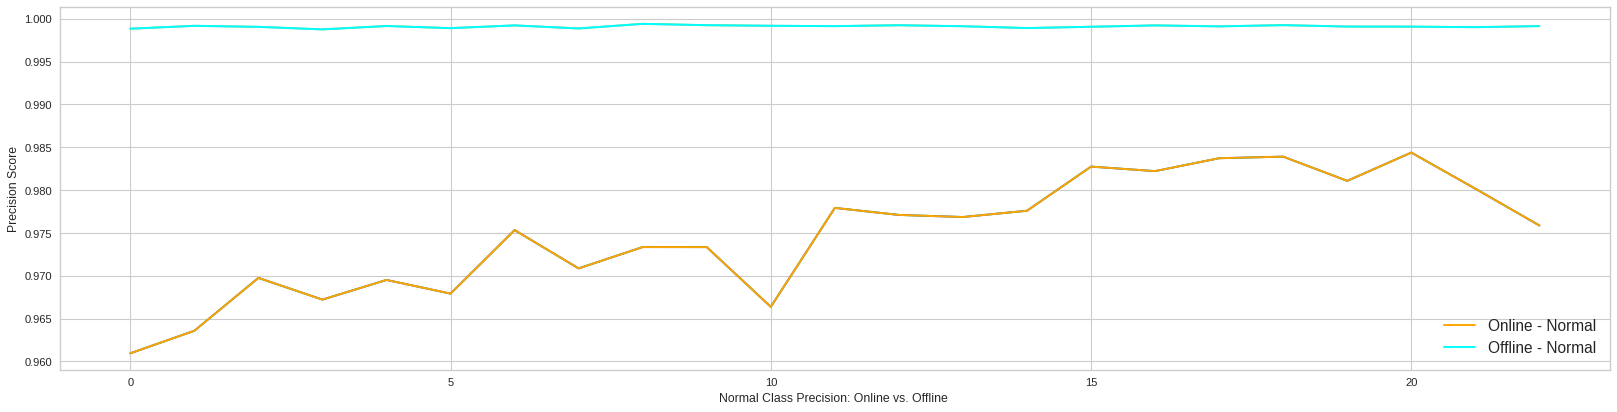

time: 285 ms (started: 2021-12-06 03:06:00 +00:00)


In [ ]:
plot_metrics(obj.online_precision["1"],'Online - Normal',  obj.offline_precision["1"], 'Offline - Normal', 'Precision Score', 'Normal Class Precision: Online vs. Offline ')

## f1-score

9. Online: f1-score for class 0 and class 1

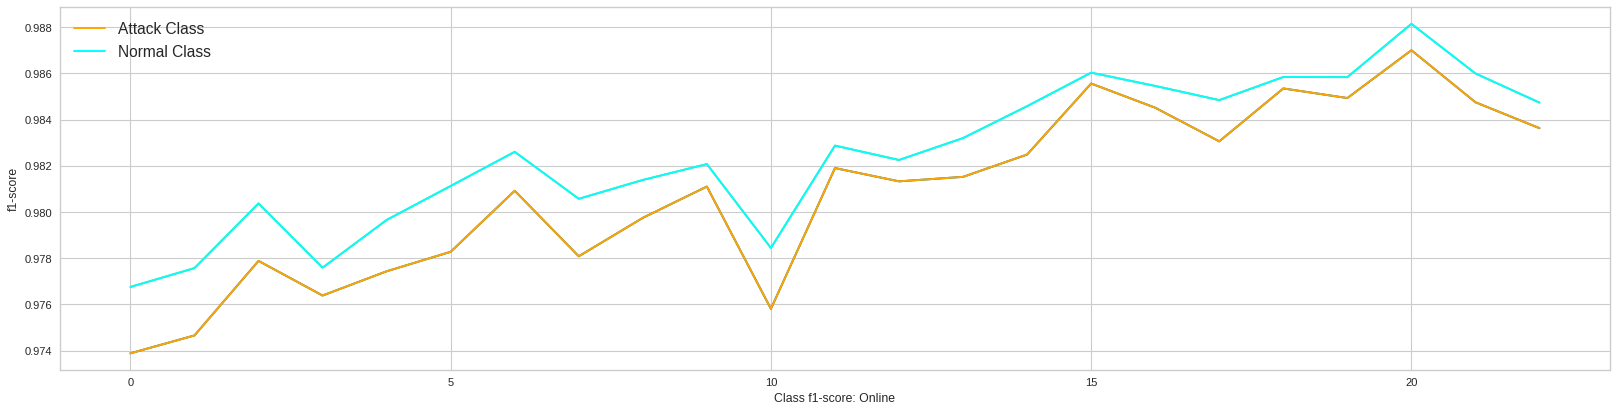

time: 265 ms (started: 2021-12-06 03:06:00 +00:00)


In [ ]:
plot_metrics(obj.online_f1["0"],'Attack Class',  obj.online_f1["1"], 'Normal Class', 'f1-score', 'Class f1-score: Online')

10. Offline: f1-score for class 0 and class 1

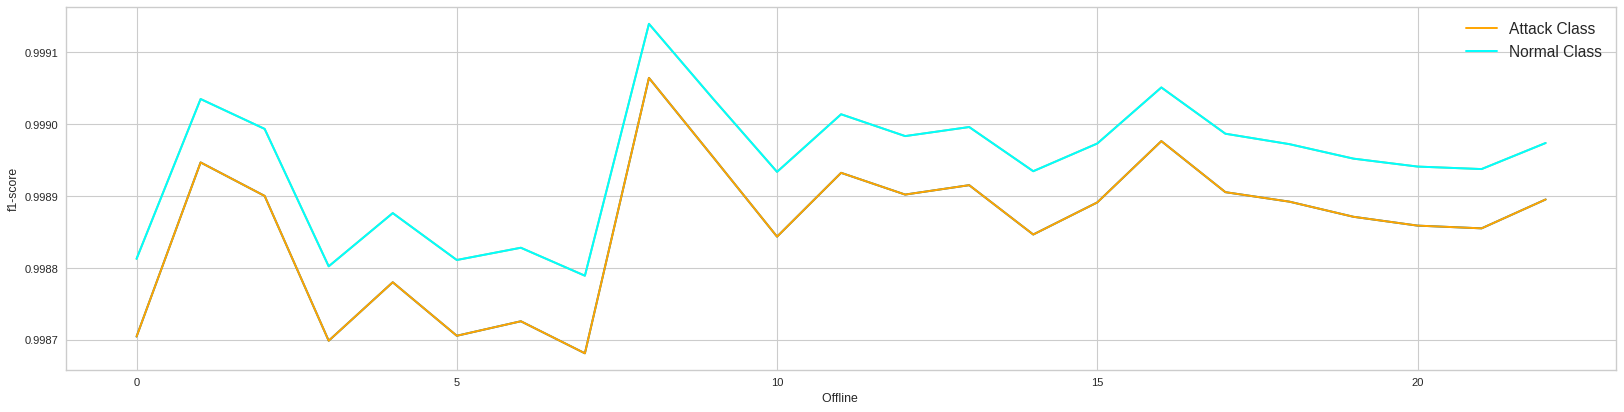

time: 268 ms (started: 2021-12-06 03:06:01 +00:00)


In [ ]:
plot_metrics(obj.offline_f1["0"],'Attack Class',  obj.offline_f1["1"], 'Normal Class', 'f1-score', 'Offline ')

11. f1-score Class 0: Online and Offline

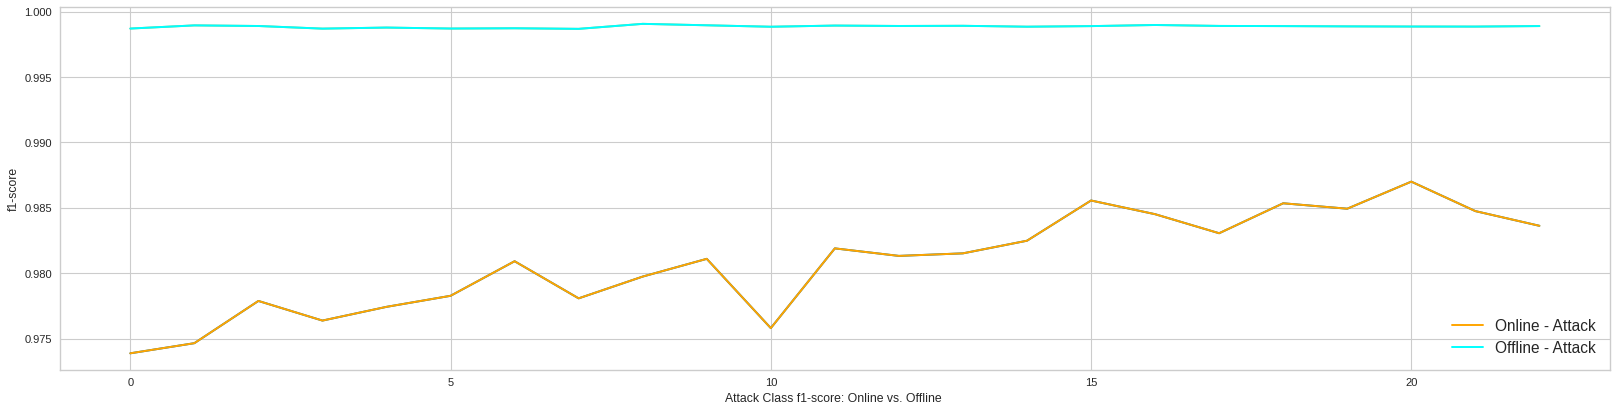

time: 275 ms (started: 2021-12-06 03:06:01 +00:00)


In [ ]:
plot_metrics(obj.online_f1["0"],'Online - Attack',  obj.offline_f1["0"], 'Offline - Attack', 'f1-score', 'Attack Class f1-score: Online vs. Offline ')

12. f1-score Class 1: Online and Offline

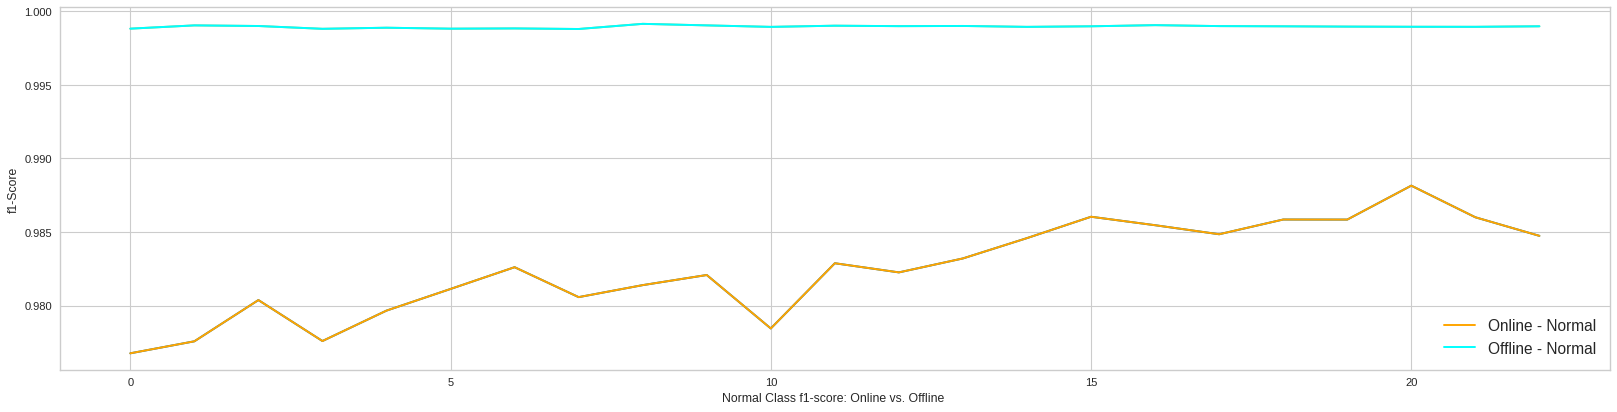

time: 254 ms (started: 2021-12-06 03:06:01 +00:00)


In [ ]:
plot_metrics(obj.online_f1["1"],'Online - Normal',  obj.offline_f1["1"], 'Offline - Normal', 'f1-Score', 'Normal Class f1-score: Online vs. Offline ')

## Accuracy

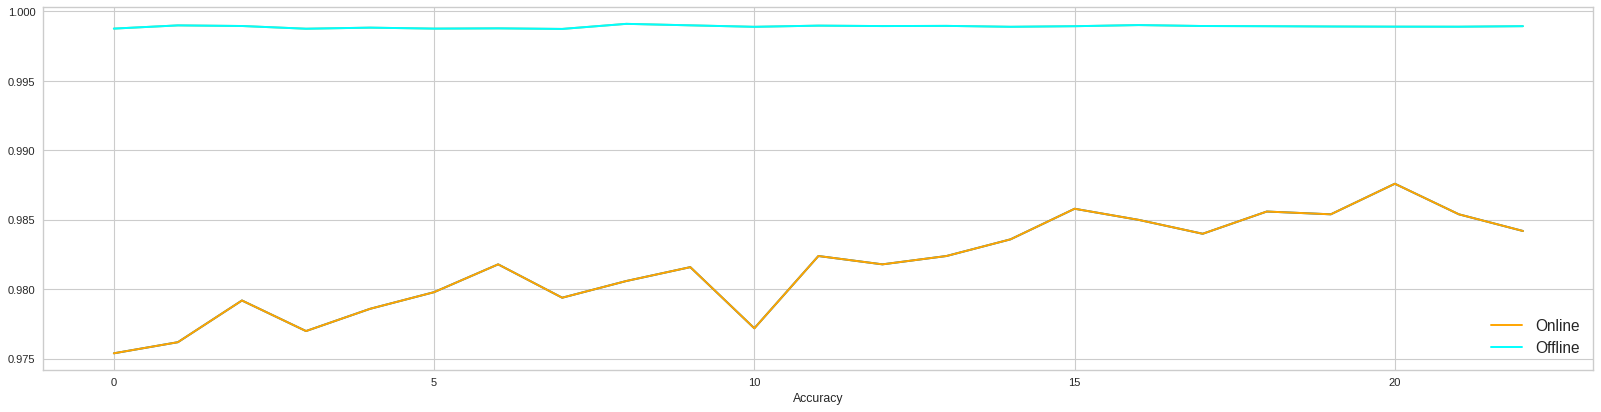

time: 279 ms (started: 2021-12-06 03:06:01 +00:00)


In [ ]:
plot_metrics(obj.online_acc, 'Online',  obj.offline_acc, 'Offline', '', 'Accuracy')

# Kappa

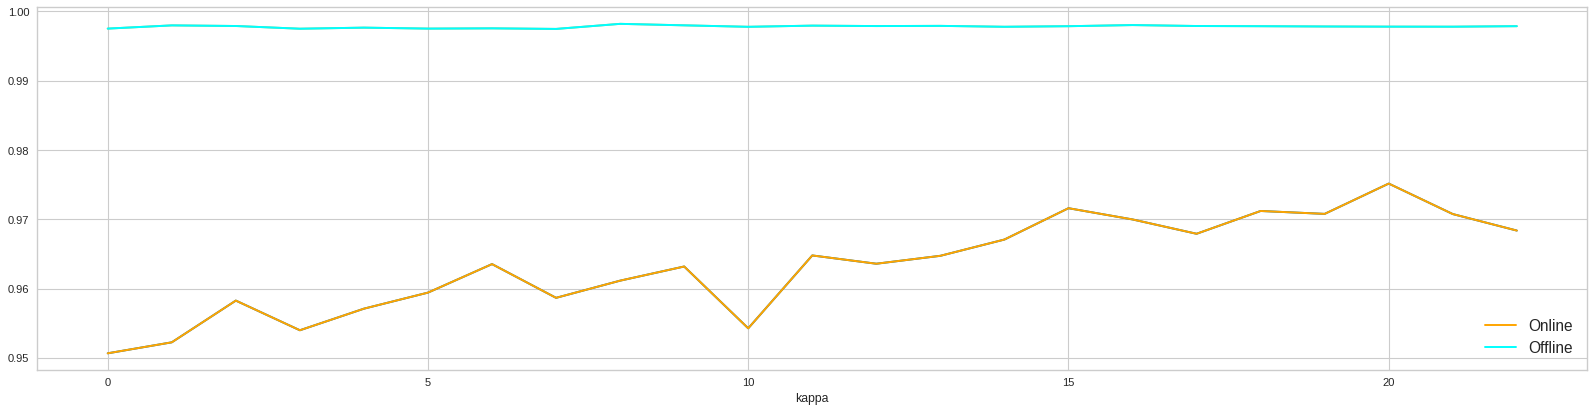

time: 260 ms (started: 2021-12-06 03:04:21 +00:00)


In [ ]:
plot_metrics(obj.online_kappa, 'Online',  obj.offline_kappa, 'Offline', '', 'kappa')

# false negatives

In [ ]:
obj.online_fn

[18,
 21,
 23,
 30,
 26,
 14,
 26,
 25,
 27,
 23,
 24,
 31,
 32,
 27,
 22,
 27,
 29,
 37,
 31,
 24,
 21,
 21,
 16]

time: 4.91 ms (started: 2021-12-06 04:05:27 +00:00)


In [ ]:
obj.offline_fn

[22,
 23,
 25,
 30,
 40,
 40,
 53,
 47,
 44,
 49,
 58,
 52,
 63,
 59,
 57,
 64,
 67,
 71,
 85,
 80,
 84,
 83,
 90]

time: 4.37 ms (started: 2021-12-06 04:05:20 +00:00)


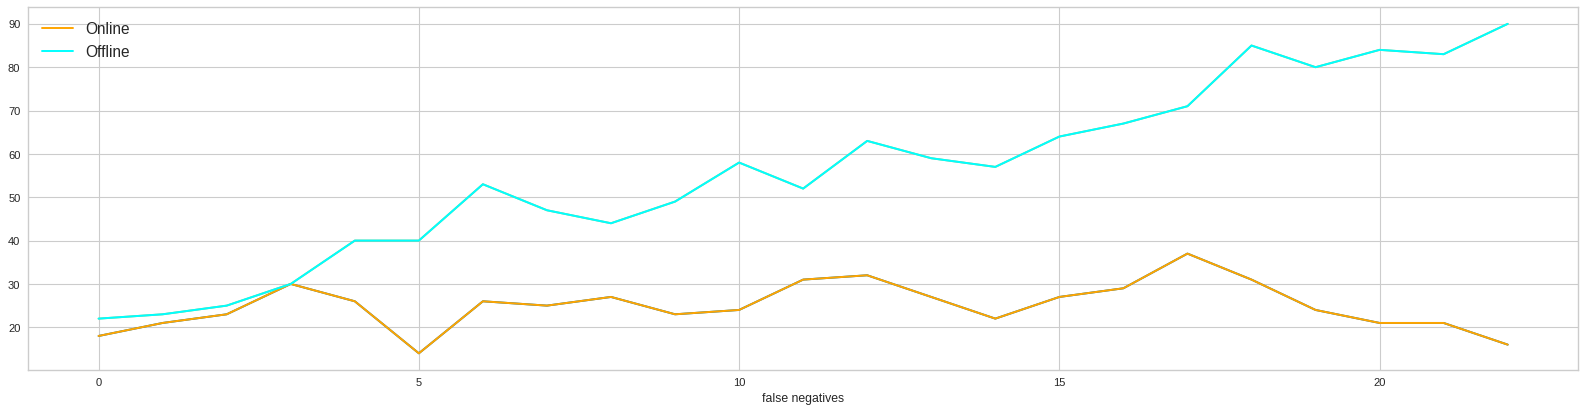

time: 258 ms (started: 2021-12-06 03:09:18 +00:00)


In [ ]:
plot_metrics(obj.online_fn, 'Online',  obj.offline_fn, 'Offline', '', 'false negatives')

# Plot



1.   Online: Recall for class 0 and class 1
2.   Offline: Recall for class 0 and class 1
3.   Recall Class 0: Online and Offline
4.   Recall Class 1: Online and Offline
----------------------------------------------
5.   Online: Precision for class 0 and class 1
6.   Offline: Recall for class 0 and class 1
7.   Precision Class 0: Online and Offline
8.   Precision Class 1: Online and Offline
-----------------------------------------------
9.   Online: f1-score for class 0 and class 1
10.  Offline: f1-score for class 0 and class 1
11.  f1-score Class 0: Online and Offline
12.  f1-score Class 1: Online and Offline
-----------------------------------------------
13.  Online: Accuracy 
14.  Offline: Accuracy
-----------------------------------------------
15.  Online: Kappa
16.  Offline: Kappa
-----------------------------------------------
17.  Online: false negative
18.  Offline:  false negative



In [ ]:
# plot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot

def plot_metrics(metric0,label_mectric0, metric1, label_mectric1, y_label, x_label):
  figure(figsize=(25, 6), dpi=80)
  plt.plot(np.array(metric0))
  plt.plot(np.array(metric1))
  plt.plot(metric0, label=label_mectric0, color='orange')
  plt.plot(metric1, label=label_mectric1, color='cyan')
  plt.ylabel(y_label)
  plt.xlabel(x_label)
  plt.legend(fontsize=14)
  plt.show()

time: 12 ms (started: 2021-12-06 01:53:14 +00:00)


## Recall

1. Online: Recall for class 0 and class 1

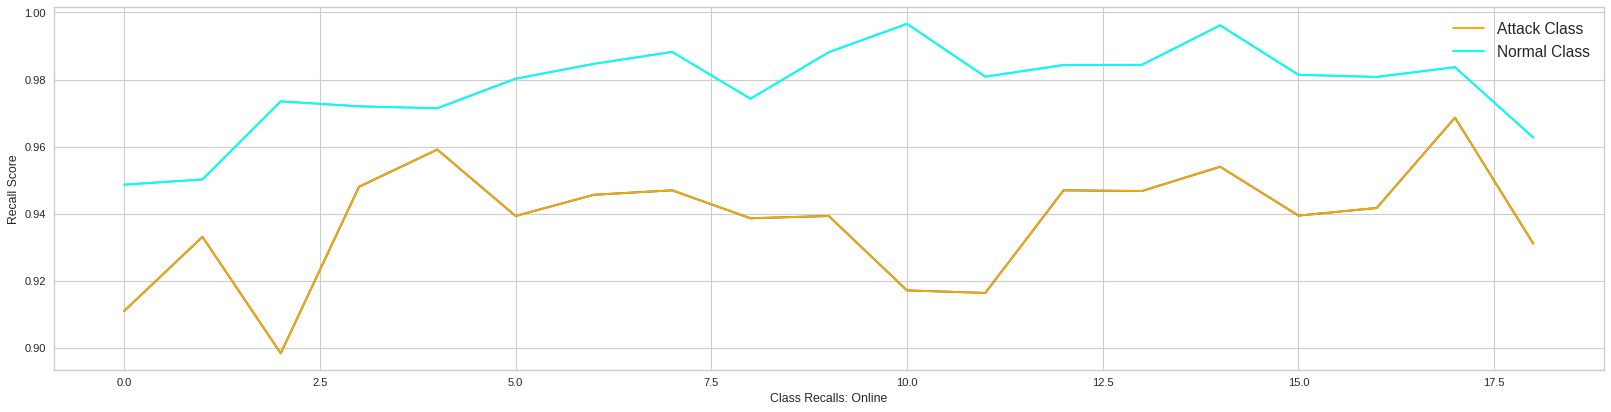

time: 328 ms (started: 2021-12-06 01:53:14 +00:00)


In [ ]:
plot_metrics(obj.online_recall["0"],'Attack Class',  obj.online_recall["1"], 'Normal Class', 'Recall Score', 'Class Recalls: Online')

2. Offline: Recall for class 0 and class 1

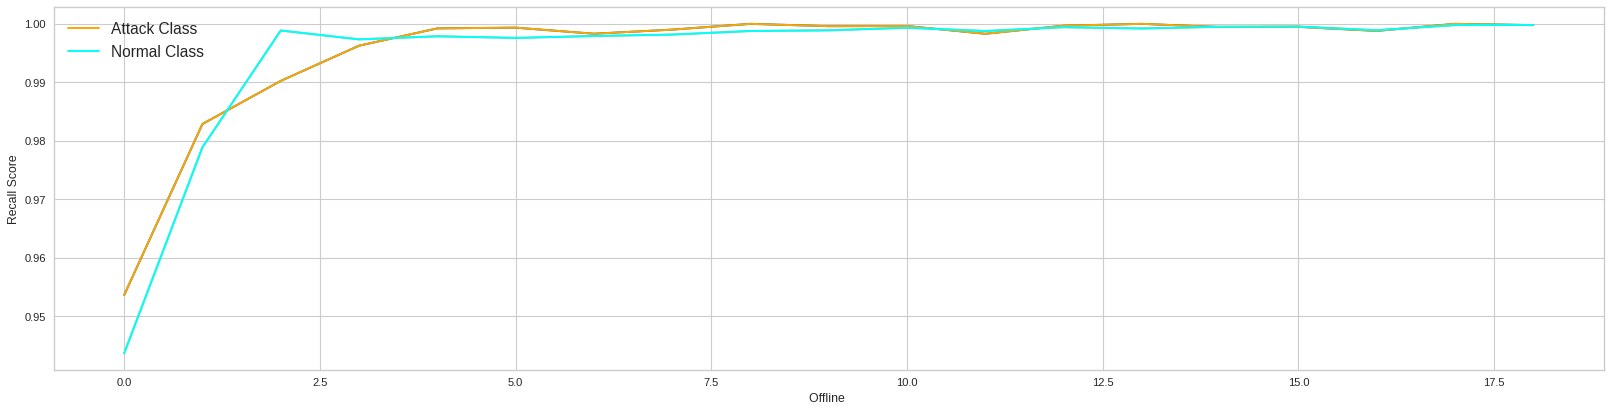

time: 339 ms (started: 2021-12-06 01:53:14 +00:00)


In [ ]:
plot_metrics(obj.offline_recall["0"],'Attack Class',  obj.offline_recall["1"], 'Normal Class', 'Recall Score', 'Offline ')

3. Recall Class 0: Online and Offline

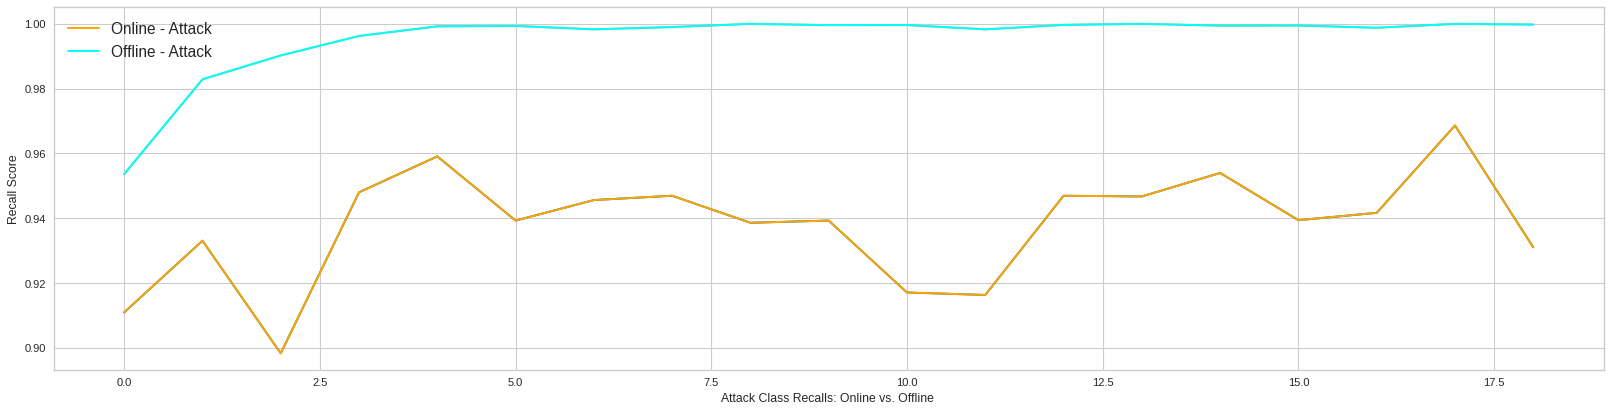

time: 290 ms (started: 2021-12-06 01:53:15 +00:00)


In [ ]:
plot_metrics(obj.online_recall["0"],'Online - Attack',  obj.offline_recall["0"], 'Offline - Attack', 'Recall Score', 'Attack Class Recalls: Online vs. Offline ')

4. Recall Class 1: Online and Offline

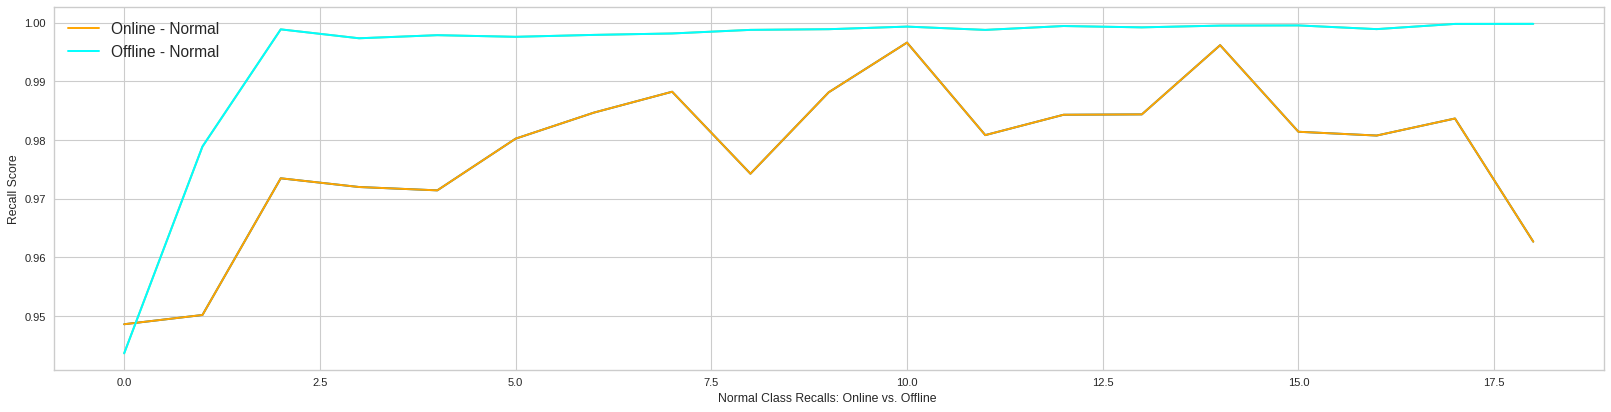

time: 287 ms (started: 2021-12-06 01:53:15 +00:00)


In [ ]:
plot_metrics(obj.online_recall["1"],'Online - Normal',  obj.offline_recall["1"], 'Offline - Normal', 'Recall Score', 'Normal Class Recalls: Online vs. Offline ')

## Precision

5. Online: Precision for class 0 and class 1

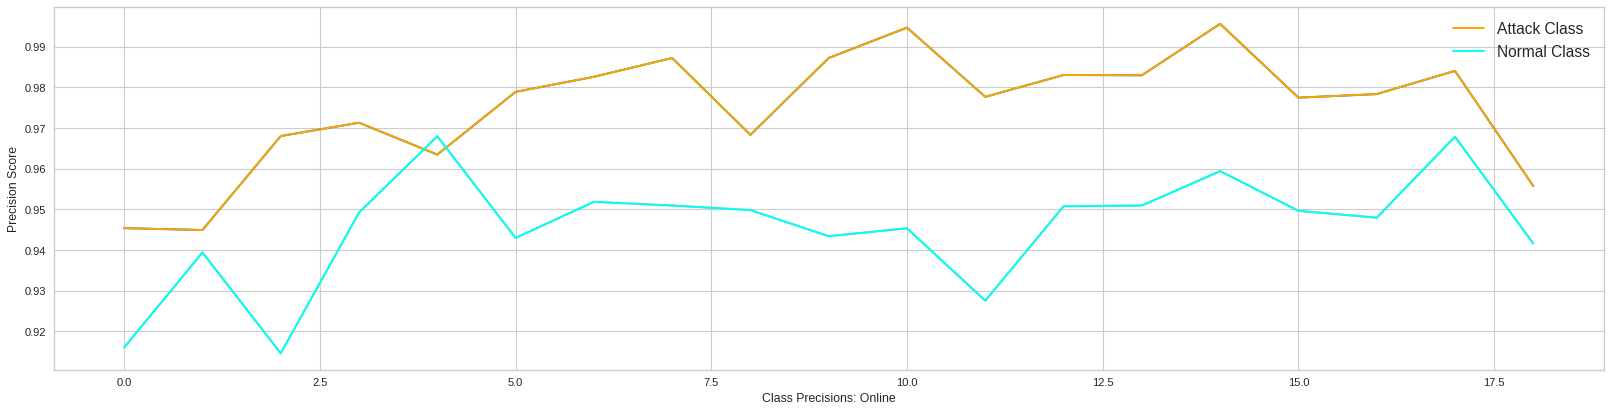

time: 348 ms (started: 2021-12-06 01:53:15 +00:00)


In [ ]:
plot_metrics(obj.online_precision["0"],'Attack Class',  obj.online_precision["1"], 'Normal Class', 'Precision Score', 'Class Precisions: Online')

6. Offline: Precision for class 0 and class 1

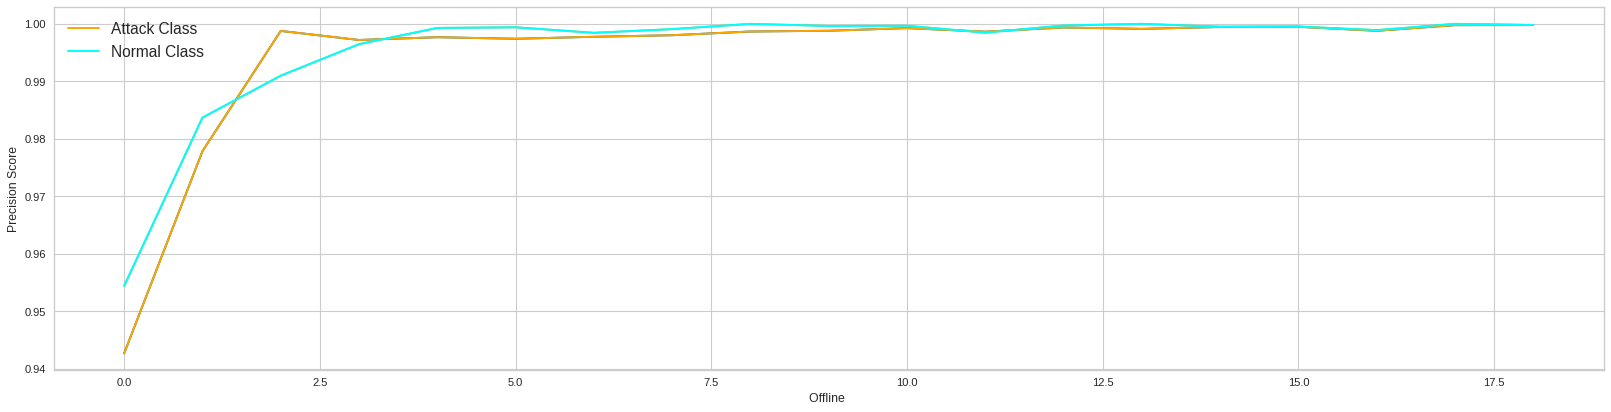

time: 295 ms (started: 2021-12-06 01:53:16 +00:00)


In [ ]:
plot_metrics(obj.offline_precision["0"],'Attack Class',  obj.offline_precision["1"], 'Normal Class', 'Precision Score', 'Offline ')

7. Precision Class 0: Online and Offline

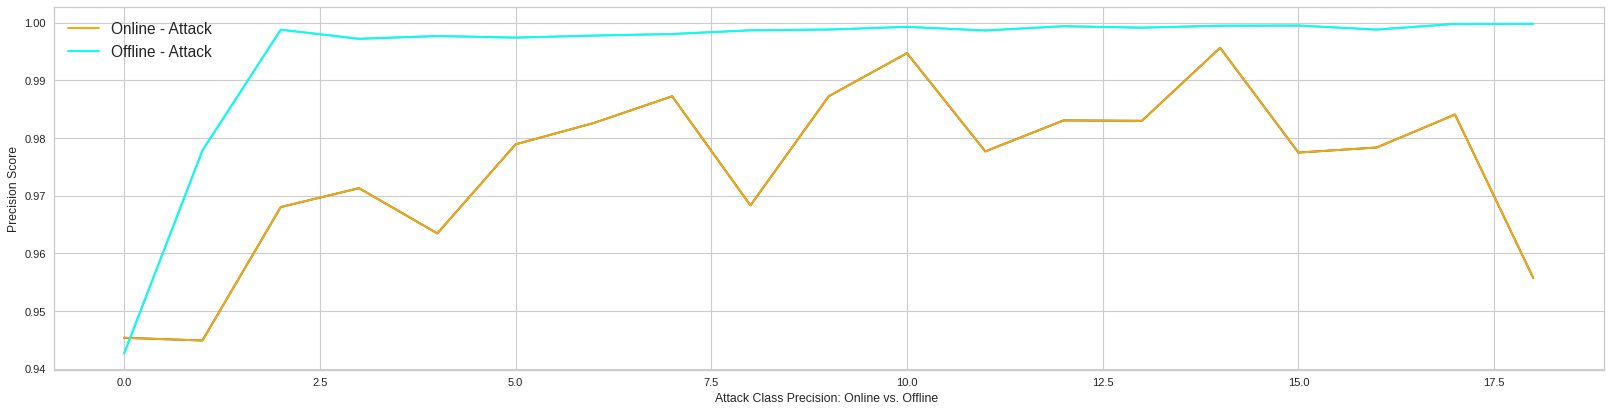

time: 317 ms (started: 2021-12-06 01:53:16 +00:00)


In [ ]:
plot_metrics(obj.online_precision["0"],'Online - Attack',  obj.offline_precision["0"], 'Offline - Attack', 'Precision Score', 'Attack Class Precision: Online vs. Offline ')

8. Precision Class 1: Online and Offline

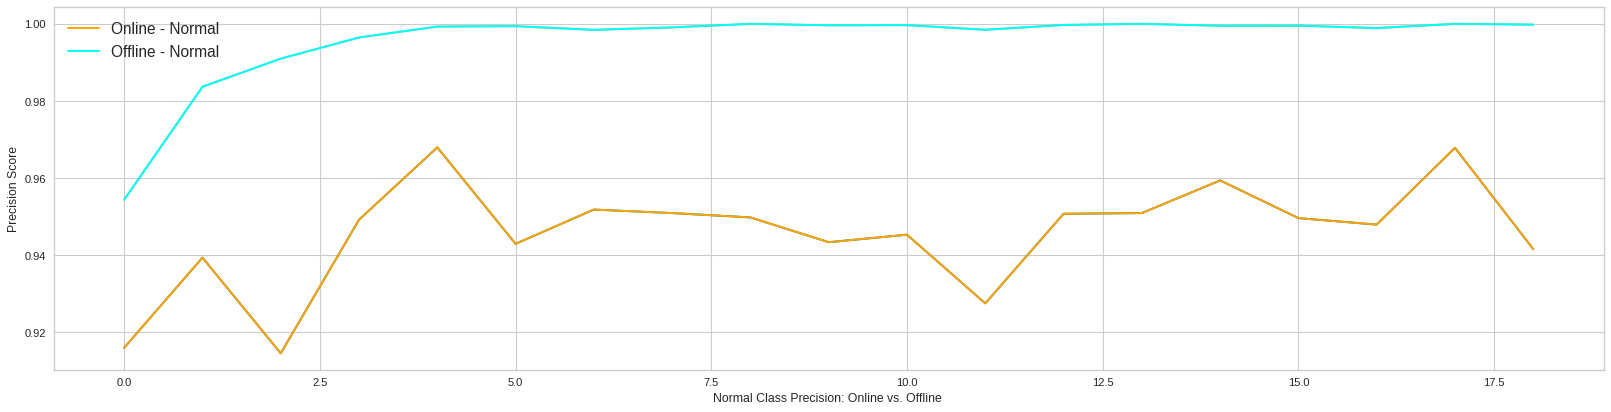

time: 298 ms (started: 2021-12-06 01:53:16 +00:00)


In [ ]:
plot_metrics(obj.online_precision["1"],'Online - Normal',  obj.offline_precision["1"], 'Offline - Normal', 'Precision Score', 'Normal Class Precision: Online vs. Offline ')

## f1-score

9. Online: f1-score for class 0 and class 1

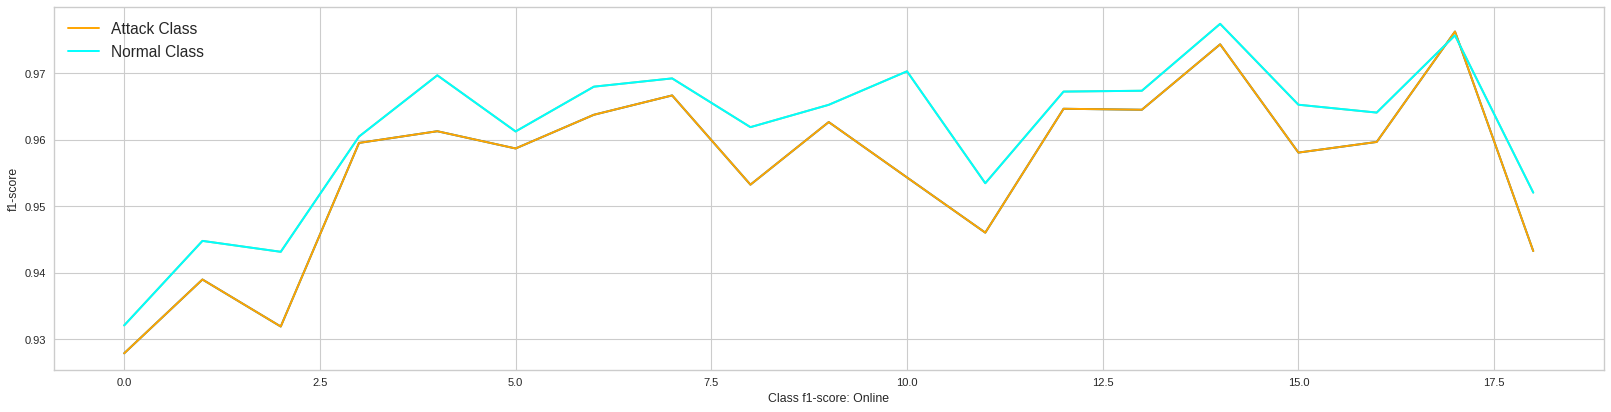

time: 316 ms (started: 2021-12-06 01:53:17 +00:00)


In [ ]:
plot_metrics(obj.online_f1["0"],'Attack Class',  obj.online_f1["1"], 'Normal Class', 'f1-score', 'Class f1-score: Online')

10. Offline: f1-score for class 0 and class 1

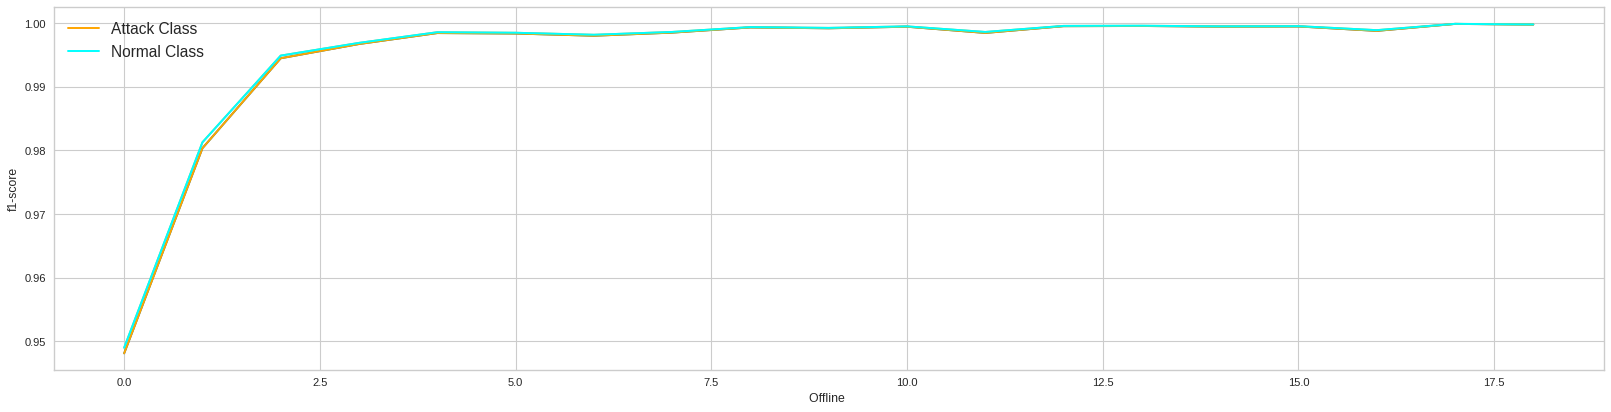

time: 294 ms (started: 2021-12-06 01:53:17 +00:00)


In [ ]:
plot_metrics(obj.offline_f1["0"],'Attack Class',  obj.offline_f1["1"], 'Normal Class', 'f1-score', 'Offline ')

11. f1-score Class 0: Online and Offline

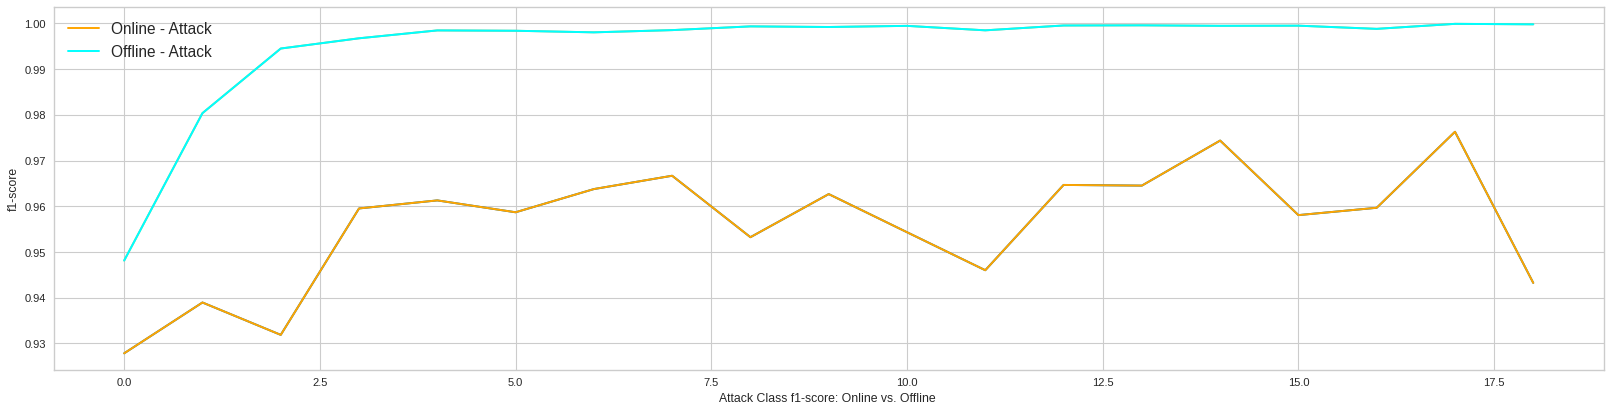

time: 298 ms (started: 2021-12-06 01:53:17 +00:00)


In [ ]:
plot_metrics(obj.online_f1["0"],'Online - Attack',  obj.offline_f1["0"], 'Offline - Attack', 'f1-score', 'Attack Class f1-score: Online vs. Offline ')

12. f1-score Class 1: Online and Offline

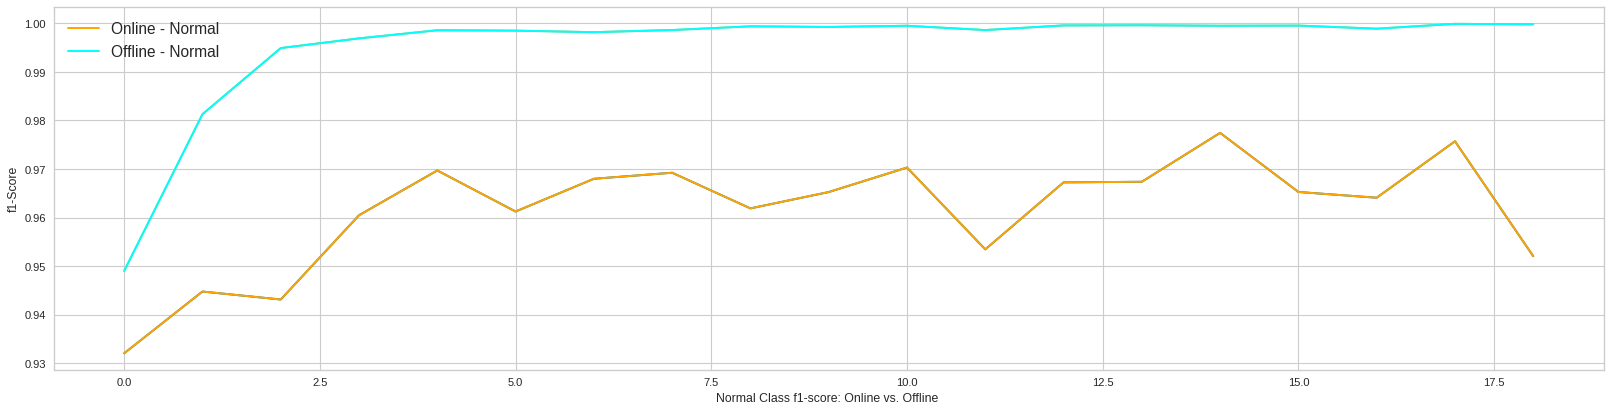

time: 307 ms (started: 2021-12-06 01:53:18 +00:00)


In [ ]:
plot_metrics(obj.online_f1["1"],'Online - Normal',  obj.offline_f1["1"], 'Offline - Normal', 'f1-Score', 'Normal Class f1-score: Online vs. Offline ')

## Accuracy

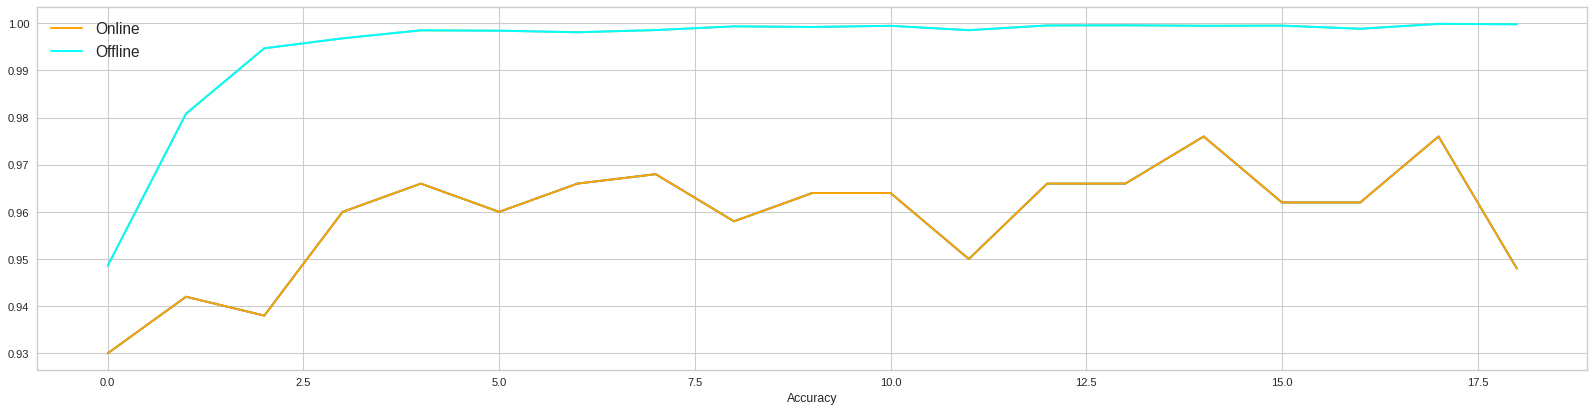

time: 303 ms (started: 2021-12-06 01:53:18 +00:00)


In [ ]:
plot_metrics(obj.online_acc, 'Online',  obj.offline_acc, 'Offline', '', 'Accuracy')